# I) Data Analysis

-   **Age**: The age of the patient in years.
    
-   **Sex**: The gender of the patient:
    
    -   **M**: Male
    -   **F**: Female
-   **ChestPainType**: The type of chest pain the patient experiences:
    
    -   **TA (Typical Angina)**: Chest pain related to the heart.
    -   **ATA (Atypical Angina)**: Chest pain not usually linked to the heart.
    -   **NAP (Non-Anginal Pain)**: Chest pain unrelated to heart issues.
    -   **ASY (Asymptomatic)**: No chest pain symptoms.
-   **RestingBP**: The patient's blood pressure when resting, measured in millimeters of mercury (**mm Hg**).
    
-   **Cholesterol**: The level of cholesterol in the blood, measured in milligrams per deciliter (**mg/dl**).
    
-   **FastingBS**: Blood sugar levels after fasting:
    
    -   **1**: Blood sugar is above 120 mg/dl.
    -   **0**: Blood sugar is 120 mg/dl or below.
-   **RestingECG**: Results of an electrocardiogram (a test that records the heart's electrical activity):
    
    -   **Normal**: Heart activity appears normal.
    -   **ST**: Abnormal patterns in the heart’s electrical signals.
    -   **LVH**: Possible enlargement or thickening of the heart’s left chamber.
-   **MaxHR**: The maximum heart rate the patient achieved during a test, typically between 60 and 202 beats per minute.
    
-   **ExerciseAngina**: Whether the patient experiences chest pain triggered by exercise:
    
    -   **Y**: Yes
    -   **N**: No
-   **Oldpeak**: A measure of ST-segment depression, which helps assess heart stress during exercise.
    
-   **ST_Slope**: The slope (direction) of the ST-segment during peak exercise:
    
    -   **Up**: Positive slope.
    -   **Flat**: Level or no slope.
    -   **Down**: Negative slope.
-   **HeartDisease**: The final outcome showing if the patient has heart disease:
    
    -   **1**: Has heart disease.
    -   **0**: Normal, no heart disease.

## 1) Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
object_columns = data.select_dtypes(include=['object']).columns
for column in object_columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique())
    print("-" * 50)

Unique values in 'Sex':
['M' 'F']
--------------------------------------------------
Unique values in 'ChestPainType':
['ATA' 'NAP' 'ASY' 'TA']
--------------------------------------------------
Unique values in 'RestingECG':
['Normal' 'ST' 'LVH']
--------------------------------------------------
Unique values in 'ExerciseAngina':
['N' 'Y']
--------------------------------------------------
Unique values in 'ST_Slope':
['Up' 'Flat' 'Down']
--------------------------------------------------


## 2) Data Visualization

In [7]:
import matplotlib.pyplot as plt
#change the style of axes
plt.style.use('seaborn-v0_8')

In [8]:
# Predefine the color palette to avoid generating it repeatedly
palette = sns.color_palette("Set2")

### 2.1) Distribution of Categorical Features

In [9]:
# Filter columns to process only categorical data
categorical_columns = [
    column for column in data.columns 
    if data[column].dtype == 'object' or len(data[column].unique()) < 10
]
# Predefine the color palette to avoid generating it repeatedly
palette = sns.color_palette("Set2")

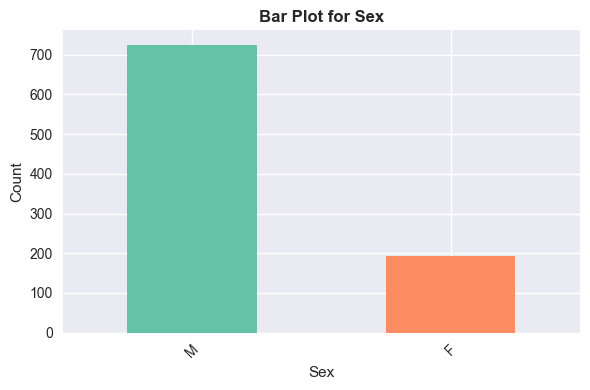

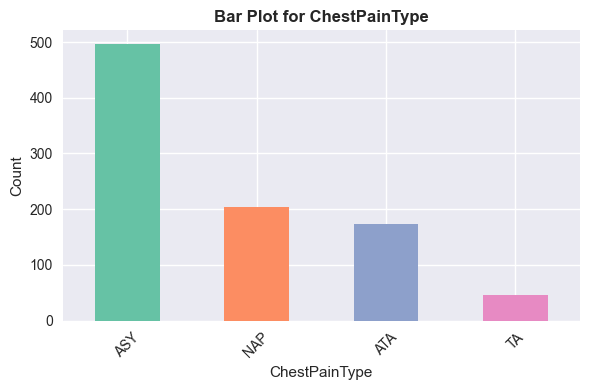

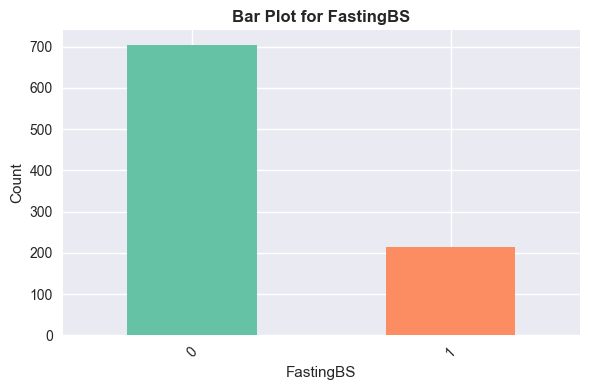

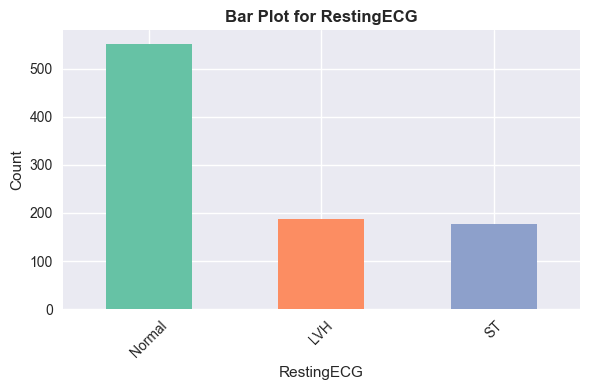

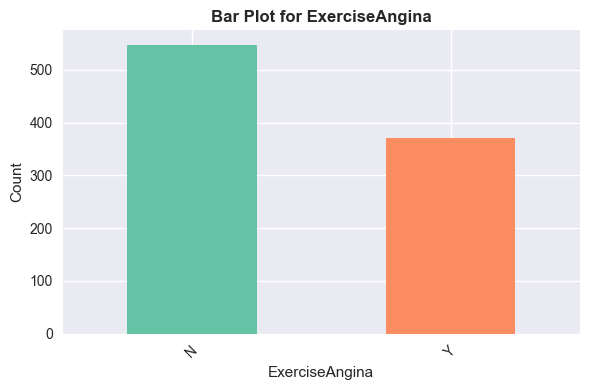

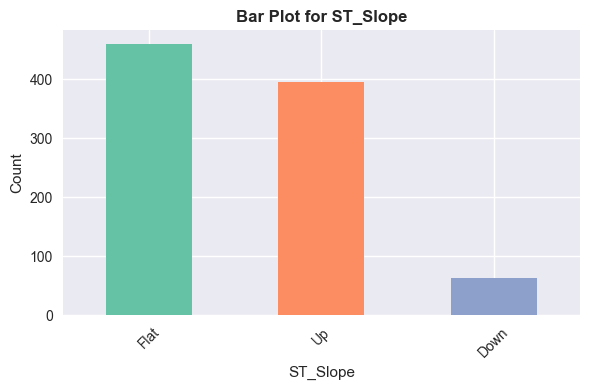

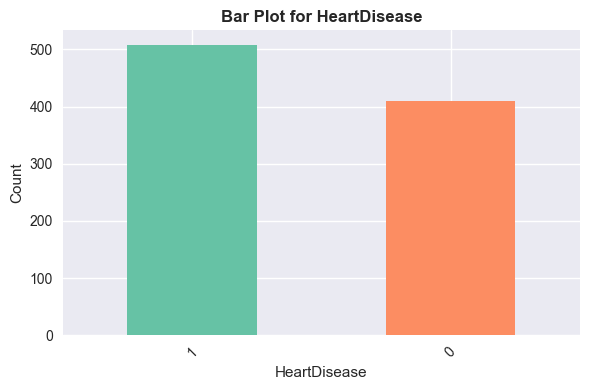

In [10]:
# Loop through categorical columns to create bar plots
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    value_counts = data[column].value_counts()
    # Use a subset of the predefined palette for colors
    colors = palette[:len(value_counts)]
    value_counts.plot(kind='bar', color=colors)
    plt.title(f"Bar Plot for {column}", fontweight='bold')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


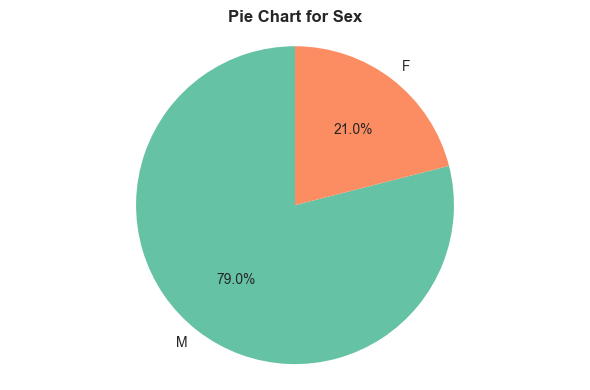

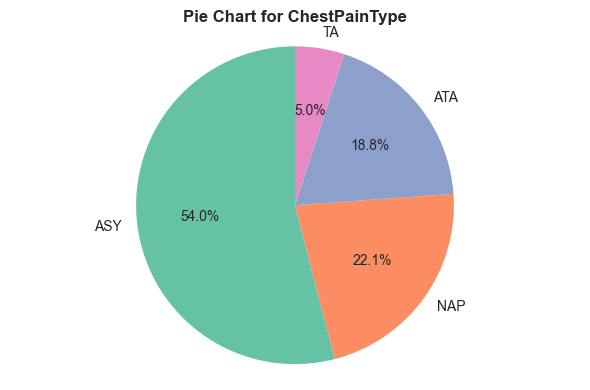

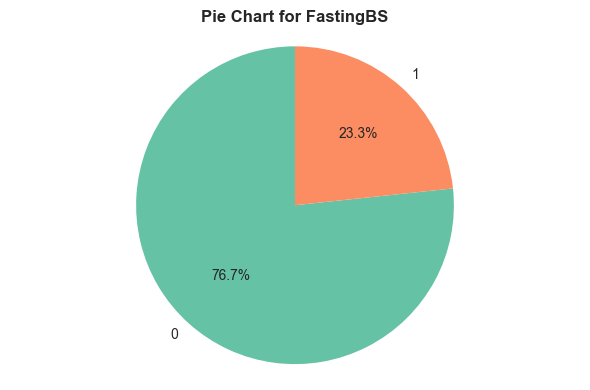

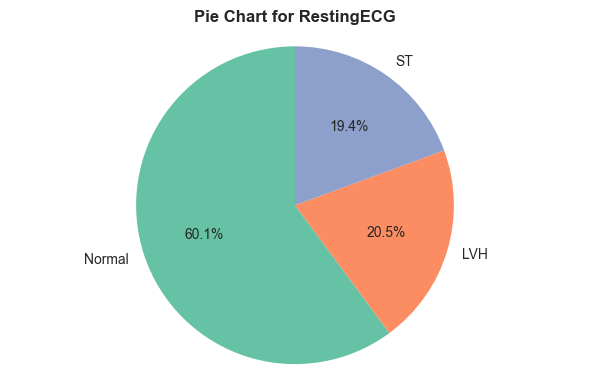

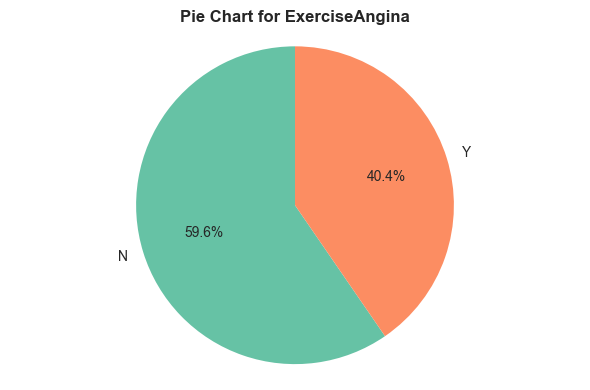

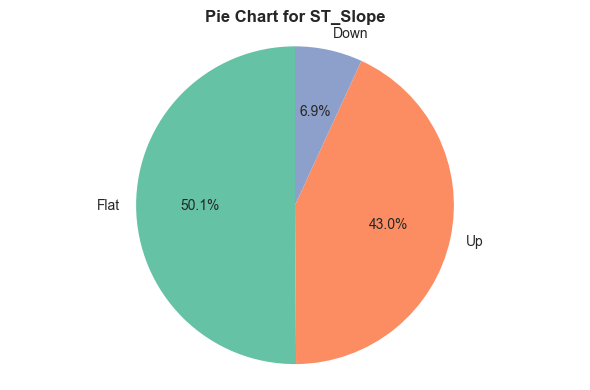

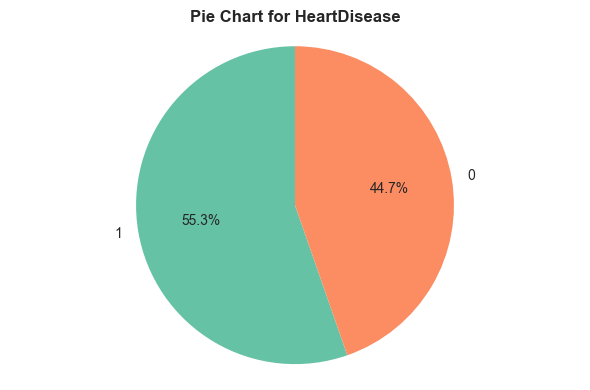

In [11]:
# Loop through each column to create pie charts
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    value_counts = data[column].value_counts()
    colors = palette[:len(value_counts)]
    # Create a pie chart
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
    
    # Title and display
    plt.title(f"Pie Chart for {column}", fontweight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    
    plt.tight_layout()
    plt.show()


### 2.2) Distribution of Continuous Features

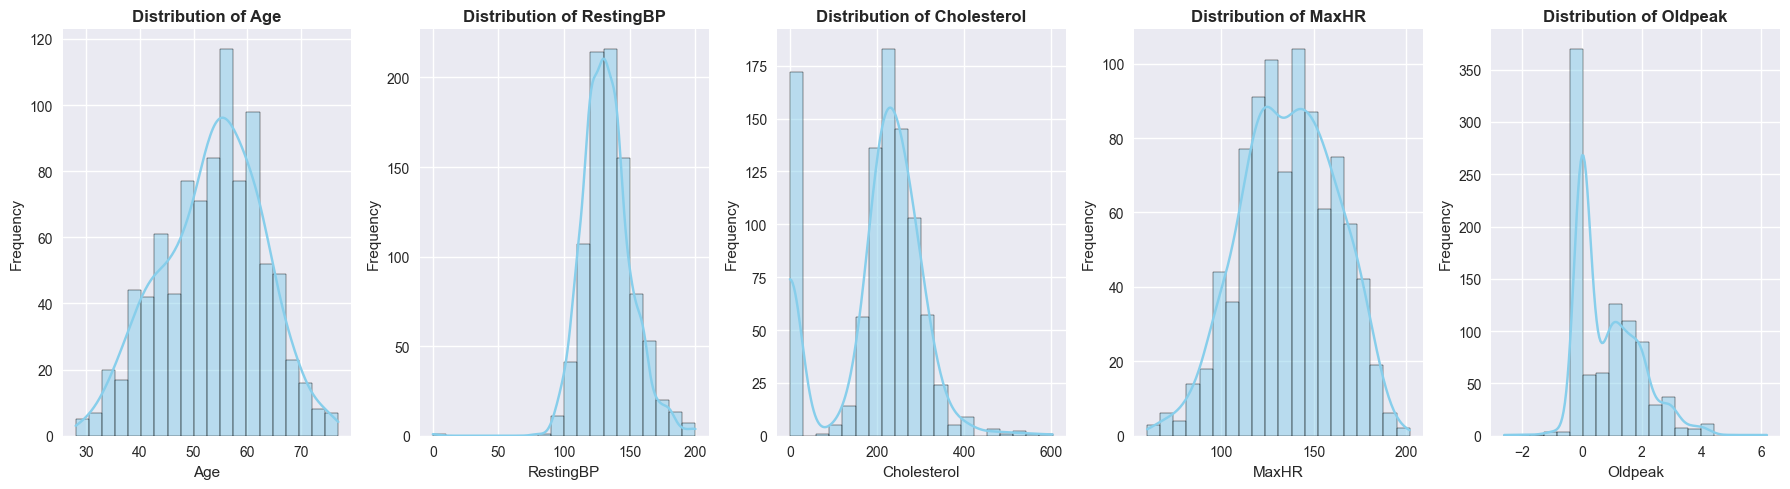

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(1, 5, figsize=(18, 5))

# List of features to plot
features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
#Age, RestingBP, Cholesterol,MaxHR,Oldpeak

# Loop through each feature to plot
for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, ax=axes[i], color='skyblue', bins=20)
    axes[i].set_title(f'Distribution of {feature}', fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### 2.3) Correlation between the HeartDisease and the rest of the elements

<Figure size 600x400 with 0 Axes>

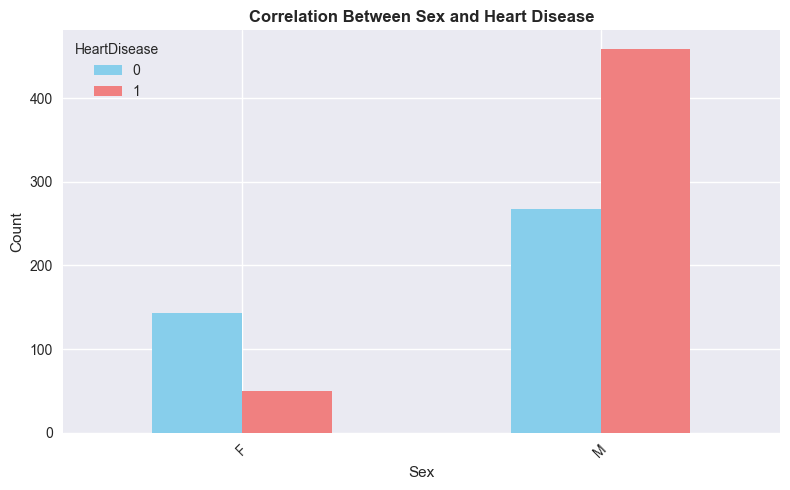

<Figure size 600x400 with 0 Axes>

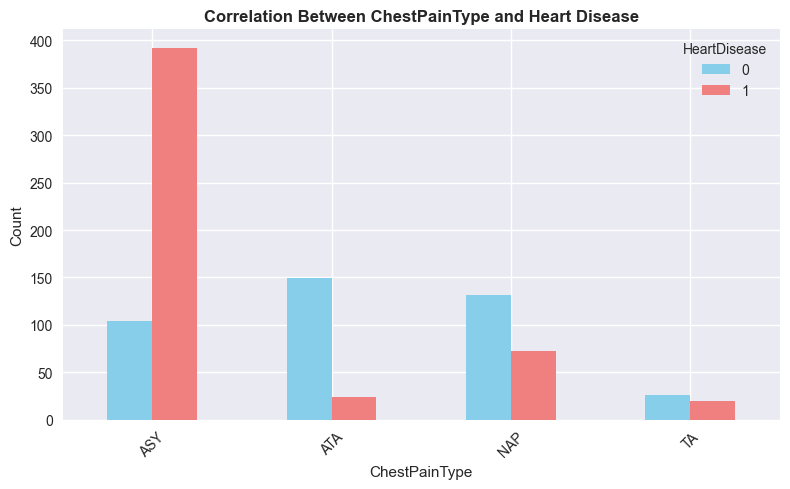

<Figure size 600x400 with 0 Axes>

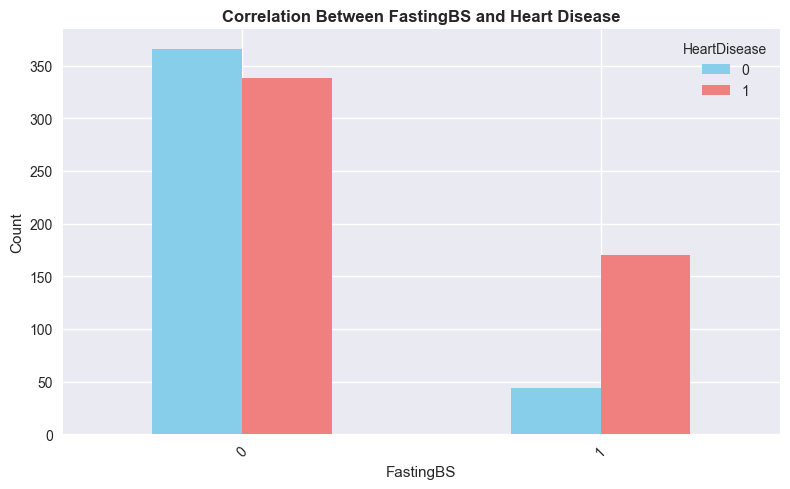

<Figure size 600x400 with 0 Axes>

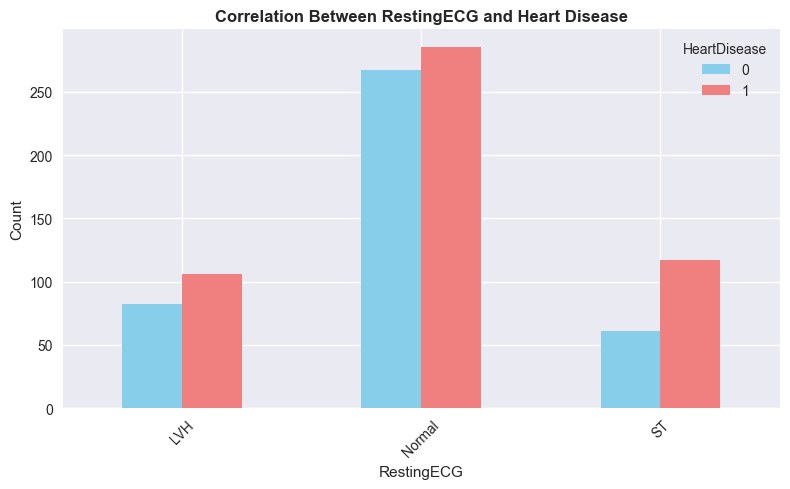

<Figure size 600x400 with 0 Axes>

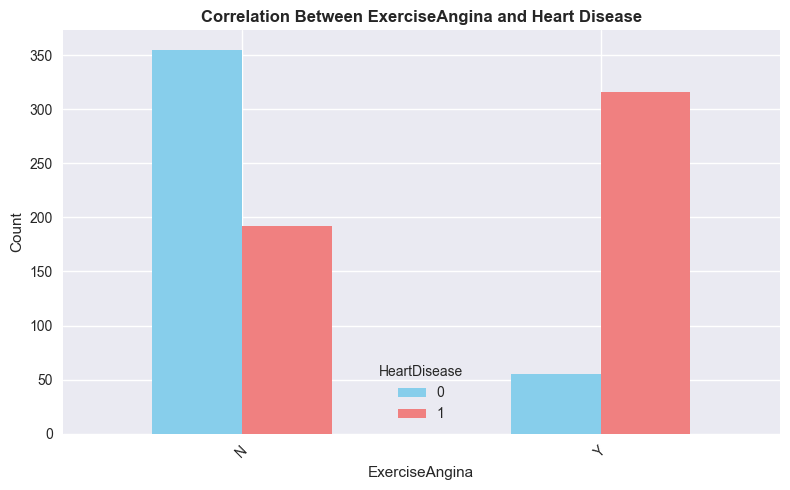

<Figure size 600x400 with 0 Axes>

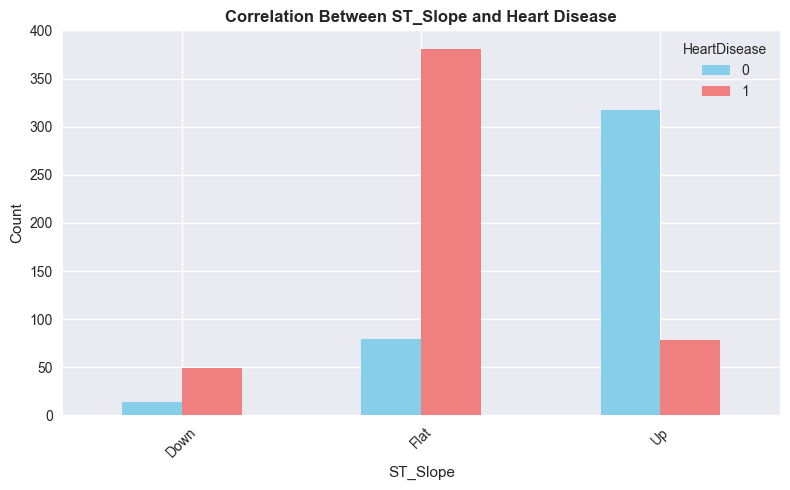

In [13]:
# List of columns to include ('Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak')
heart_relevant_columns = [col for col in data.columns if col not in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

# Loop through each column to create bar plots for the correlation with 'HeartDisease'
for column in heart_relevant_columns:
    if column != 'HeartDisease':  # Skip the 'HeartDisease' column itself
        plt.figure(figsize=(6, 4))
        
        # Group by 'heart disease' and the current column, then count occurrences
        cross_tab = pd.crosstab(data[column], data['HeartDisease'])
        
        # Plot the bar chart
        cross_tab.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'], figsize=(8, 5))
        
        # Set the title and labels
        plt.title(f"Correlation Between {column} and Heart Disease", fontweight='bold')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        
        # Show the plot
        plt.tight_layout()
        plt.show()


### 2.4) HeartDisease vs. Non-HeartDisease Distribution for ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

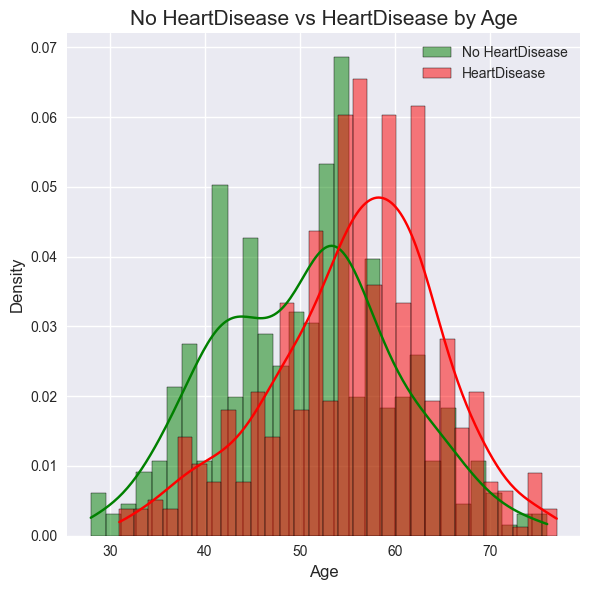

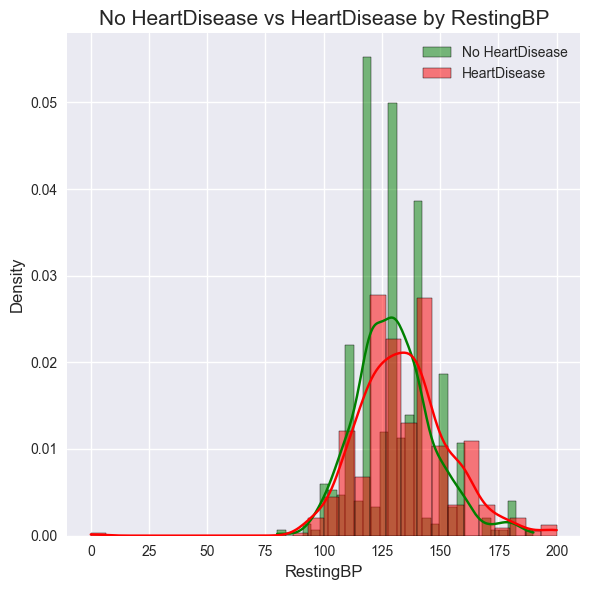

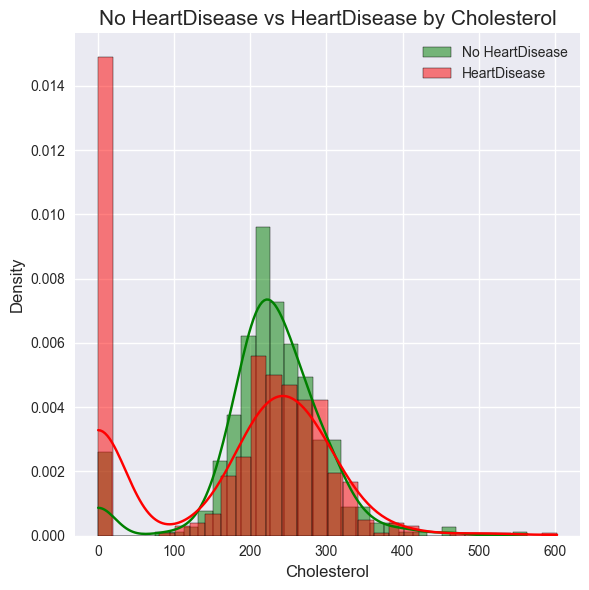

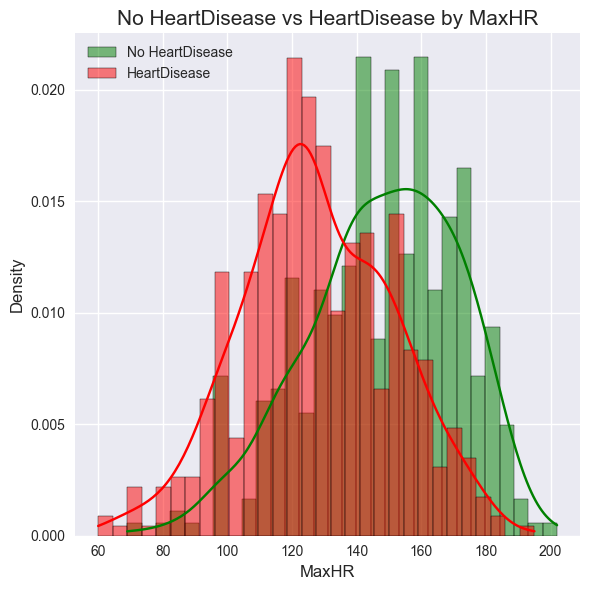

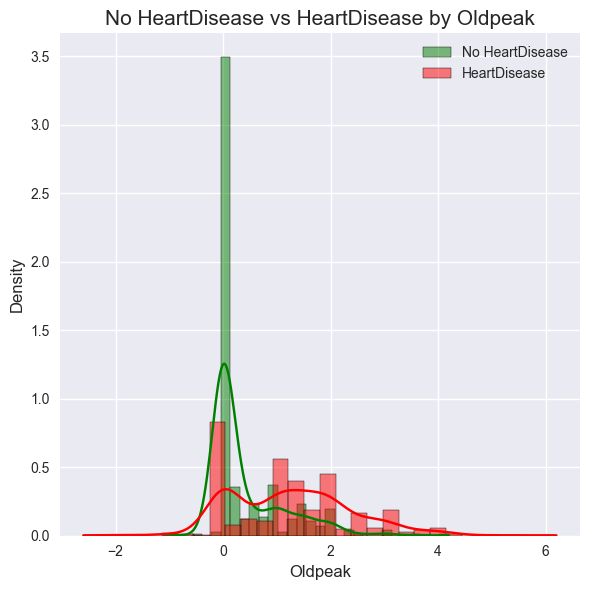

In [14]:
columns_to_plot = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for col in columns_to_plot:
    plt.figure(figsize=(6, 6))
    
    # Plot distribution for 'HeartDisease' == 0 (No HeartDisease)
    sns.histplot(data[data['HeartDisease'] == 0][col], color='green', kde=True, label='No HeartDisease', bins=30, stat='density')
    
    # Plot distribution for 'HeartDisease' == 1 (HeartDisease)
    sns.histplot(data[data['HeartDisease'] == 1][col], color='red', kde=True, label='HeartDisease', bins=30, stat='density')
    
    # Add title and labels
    plt.title(f'No HeartDisease vs HeartDisease by {col}', fontsize=15)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    
    # Show plot
    plt.tight_layout()
    plt.show()

### 2.5) Checking outliner

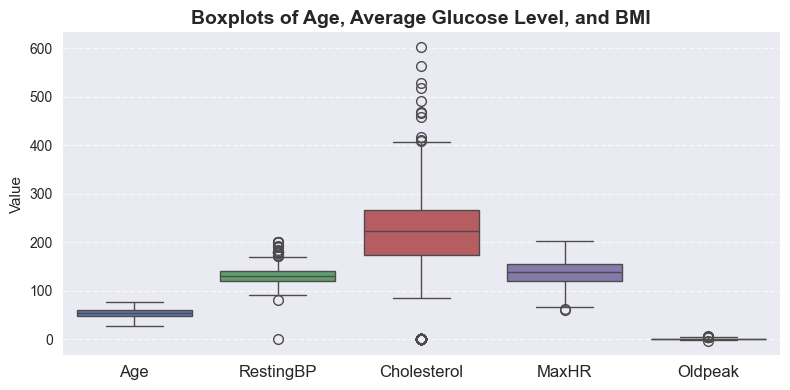

In [15]:
def boxplots(data):
    # Select the columns to visualize
    columns_to_plot = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    
    # Create a boxplot for each column
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data[columns_to_plot])
    plt.title("Boxplots of Age, Average Glucose Level, and BMI", fontweight='bold', fontsize=14)
    plt.ylabel("Value")
    plt.xticks(ticks=range(len(columns_to_plot)), labels=columns_to_plot, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
boxplots(data)

### 2.6) Missing Values Visualize

<Axes: >

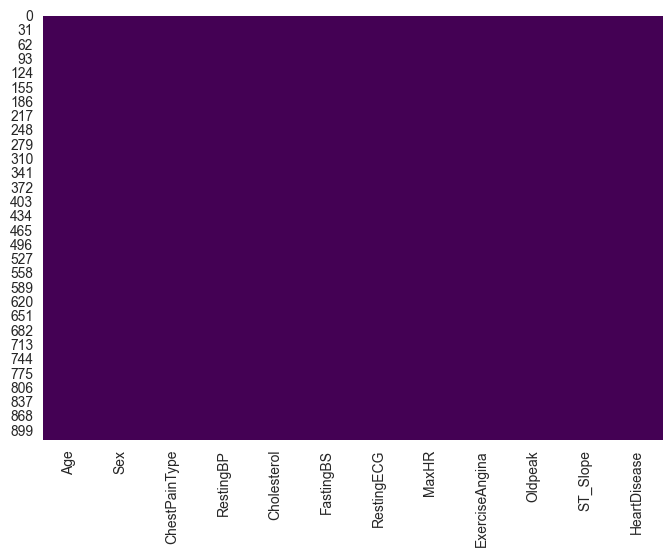

In [16]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)

# II) Data Cleaning

### 1) Missing Values Handling

In [17]:
print((data.isna().sum()/len(data))*100)

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64


### 2) Remove Outliner

In [19]:
# Processing Outliner Data
def handle_outliers(df, columns):
    """
    Function to handle outlier data by removing values outside the IQR (Interquartile Range).
    
    Parameters:
    df (DataFrame): DataFrame containing the data.
    columns (list): List of columns to process for outliers.
    
    Returns:
    DataFrame: DataFrame with outliers handled.
    """
    for column in columns:
        # Caculate IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Caculate the upper and lower limit
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove values outside IQR range
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df



In [20]:
data_no_outliers= handle_outliers(data, ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])

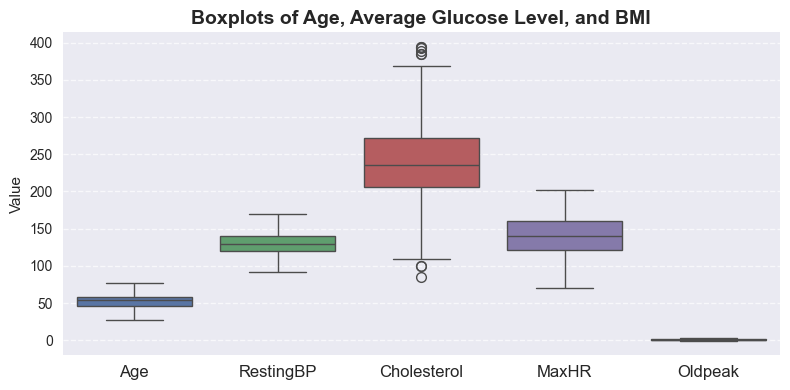

In [21]:
boxplots(data_no_outliers)

### 3) Correlation Matrix

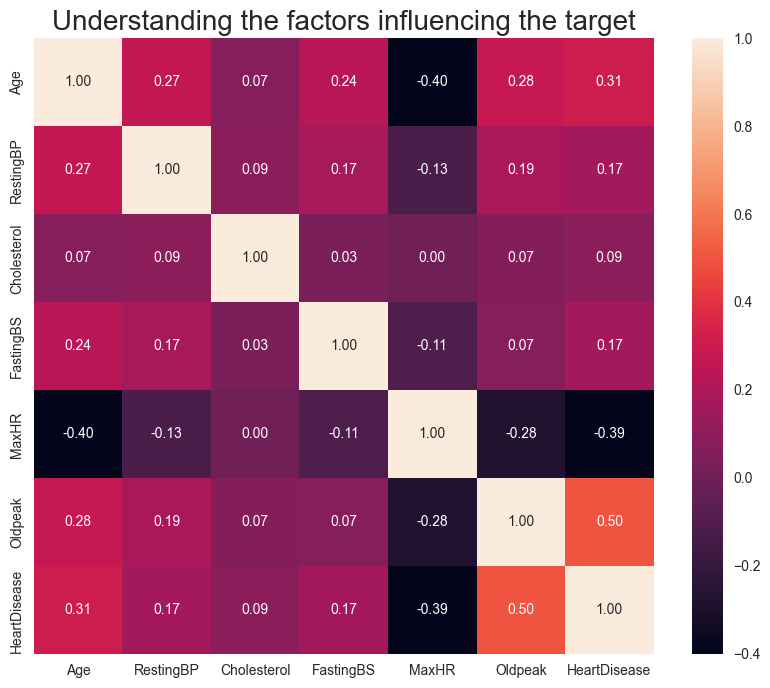

In [22]:
# Define the columns to plot
num_plot =  ['Age', 'RestingBP', 'Cholesterol','FastingBS', 'MaxHR', 'Oldpeak','HeartDisease']
# Set up the figure size
plt.figure(figsize=(10, 8))
# Plot the heatmap with correlations
sns.heatmap(data_no_outliers[num_plot].corr(), annot=True, fmt=".2f")
# Set the title and display it
plt.title("Understanding the factors influencing the target", fontsize=20)
plt.show()

# III) Data Transformation

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

## 1) String Data Handling

In [25]:
# Separate the features (X) and the target label (y)
X = data_no_outliers.drop(columns=['HeartDisease']) 
y = data_no_outliers['HeartDisease'] 

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Define categorical and numerical columns
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


In [26]:
# 4. One-Hot Encoding for categorical columns
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply One-Hot Encoding to the train and test sets
X_train_encoded = pd.DataFrame(one_hot_encoder.fit_transform(X_train[categorical_columns]))
X_test_encoded = pd.DataFrame(one_hot_encoder.transform(X_test[categorical_columns]))


In [27]:
# Restore column names for the data after One-Hot Encoding
X_train_encoded.columns = one_hot_encoder.get_feature_names_out(categorical_columns)
X_test_encoded.columns = one_hot_encoder.get_feature_names_out(categorical_columns)


In [28]:
X_train_encoded.head()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [29]:
# Remove root columns which is categorical columns in X_train and X_test
X_train = X_train.drop(columns=categorical_columns).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_columns).reset_index(drop=True)
# Combine One-Hot Encoding with data
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)


In [30]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,45,140,224,0,144,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,48,160,268,0,103,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,60,160,267,1,157,0.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,51,140,308,0,142,1.5,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,41,112,250,0,142,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## 2) Numeral Data Handling

In [31]:
# 5. Normalize data with StandardScaler
scaler = StandardScaler()
# Apply on train và test dataset
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [32]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-0.770117,0.573404,-0.320992,-0.431788,0.132239,-0.853332,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.453631,1.877390,0.554311,-0.431788,-1.547074,0.224885,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.812316,1.877390,0.534418,2.315953,0.664704,-0.314223,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,-0.137144,0.573404,1.350041,-0.431788,0.050321,0.763994,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.192099,-1.252175,0.196233,-0.431788,0.050321,-0.853332,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,-0.981108,-0.730581,-0.500031,-0.431788,1.401963,-0.853332,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
556,0.917811,1.225397,0.056980,2.315953,-0.154473,0.224885,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
557,1.023307,-0.730581,-0.400565,-0.431788,-2.243375,-0.853332,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
558,1.128802,-1.382574,0.236019,-0.431788,-0.031597,1.303102,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [33]:
import pickle

with open('standard_scaler2.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [34]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-0.770117,0.573404,-0.320992,-0.431788,0.132239,-0.853332,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.453631,1.877390,0.554311,-0.431788,-1.547074,0.224885,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.812316,1.877390,0.534418,2.315953,0.664704,-0.314223,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,-0.137144,0.573404,1.350041,-0.431788,0.050321,0.763994,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.192099,-1.252175,0.196233,-0.431788,0.050321,-0.853332,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [35]:
print(X_train.shape)
print(y_train.shape)


(560, 20)
(560,)


# IV) Training Model

## 1) SKlearn

### 1) Model Exploration

In [34]:
!pip install lazypredict

In [36]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer, confusion_matrix, roc_curve, auc
import numpy as np


In [37]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=precision_score)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)


100%|██████████| 31/31 [00:01<00:00, 27.39it/s]

[LightGBM] [Info] Number of positive: 259, number of negative: 301
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.462500 -> initscore=-0.150282
[LightGBM] [Info] Start training from score -0.150282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [38]:
# Sort the models by precision in ascending order
sorted_models = models.sort_values(by='precision_score', ascending=False)
sorted_models.head()

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,precision_score,Time Taken
Model,,,,,,
XGBClassifier,0.84,0.84,0.84,0.84,0.83,0.07
BaggingClassifier,0.84,0.84,0.84,0.84,0.83,0.05
Perceptron,0.82,0.81,0.81,0.81,0.83,0.01
LGBMClassifier,0.85,0.85,0.85,0.85,0.82,0.06
BernoulliNB,0.84,0.84,0.84,0.84,0.82,0.01


In [39]:
# Thư viện sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC


In [40]:
def find_best_params(model, param_grid, X_train, y_train, X_test, y_test, scoring=make_scorer(recall_score), cv=5):
    """
    Find the best parameters for a model using GridSearchCV.

    Args:
        model: The model to optimize (e.g., LinearSVC(), RandomForestClassifier()).
        param_grid: The parameter grid to search (dict).
        X_train: Training data (features).
        y_train: Training data (labels).
        X_test: Test data (features).
        y_test: Test data (labels).
        scoring: Scoring function (default: recall_score).
        cv: Number of folds for cross-validation (default: 5).
    
    Returns:
        best_model: The best model with optimal parameters.
        results: Evaluation results on the test set.
    """
    # Initialize GridSearchCV
    grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=cv)
    
    # Train on the training set
    grid_search.fit(X_train, y_train)
    
    # Find the best parameters
    best_params = grid_search.best_params_
    print("Best parameters: ", best_params)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Compute evaluation metrics
    results = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred)
    }
    
    # Print the results
    print("Test set accuracy: {:.2f}".format(results["accuracy"]))
    print("Test set precision: {:.2f}".format(results["precision"]))
    print("Test set recall: {:.2f}".format(results["recall"]))
    
    return best_model, results


In [41]:
def visualize_results(model, X_test, y_test, class_labels=None):
    """
    Visualize model results using a confusion matrix and ROC curve.

    Args:
        model: Trained model.
        X_test: Test data (features).
        y_test: Test data (labels).
        class_labels: List of class names (default: None).
                      If None, the default class indices will be used.
    
    Returns:
        None: The function directly displays the plots.
    """
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate prediction probabilities if the model supports it (e.g., predict_proba or decision_function)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)
    else:
        y_prob = None  # Cannot compute ROC without probabilities
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(
        cm,
        cmap='Blues',
        annot=True,
        fmt='d',
        linewidths=5,
        cbar=False,
        annot_kws={'fontsize': 15},
        yticklabels=class_labels if class_labels else [f"Class {i}" for i in range(cm.shape[0])],
        xticklabels=[f"Predicted {label}" for label in (class_labels if class_labels else [f"Class {i}" for i in range(cm.shape[1])])]
    )
    plt.yticks(rotation=0)
    plt.title("Confusion Matrix", fontsize=16)
    plt.show()

    # ROC Curve
    if y_prob is not None:
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(false_positive_rate, true_positive_rate)

        plt.figure(figsize=(4, 4))
        plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
        plt.axis('tight')
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.title('ROC Curve', fontsize=16)
        plt.show()
    else:
        print("Model does not support probability prediction (predict_proba or decision_function). ROC Curve cannot be plotted.")


### LogisticRegression

Best parameters:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}
Test set accuracy: 0.84
Test set precision: 0.82
Test set recall: 0.85


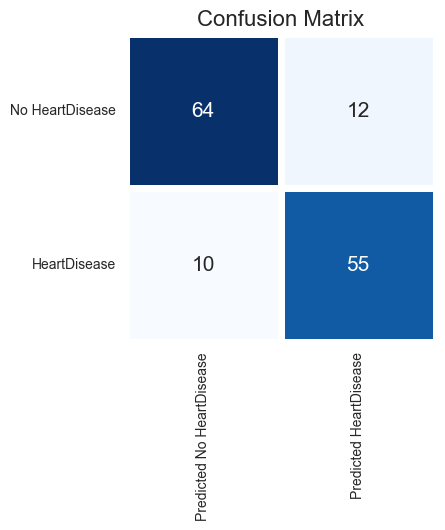

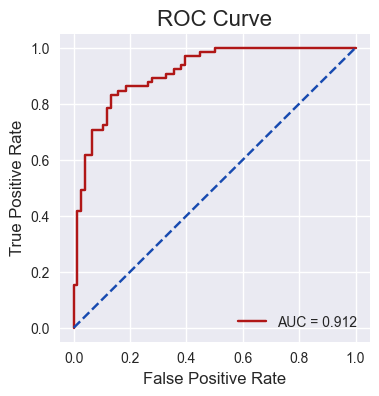

In [42]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Define the parameter grid for Logistic Regression
logistic_param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization types
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'max_iter': [100, 200, 500]  # Maximum number of iterations
}

# Find the best parameters
logistic_best_model, logistic_test_results = find_best_params(
    model=logistic_model,
    param_grid=logistic_param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    cv=5
)

# Visualize the results
visualize_results(logistic_best_model, X_test, y_test, class_labels=['No HeartDisease', 'HeartDisease'])


### Navie Bayes

Best parameters:  {}
Test set accuracy: 0.82
Test set precision: 0.78
Test set recall: 0.83


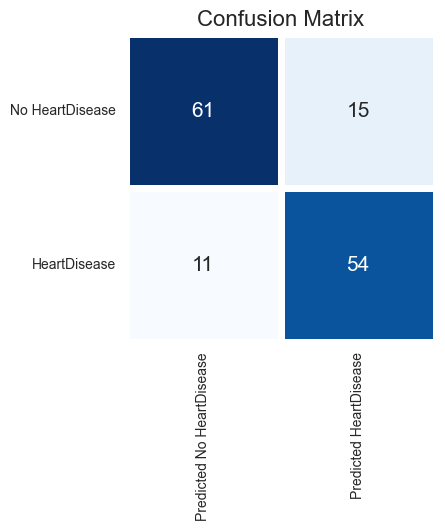

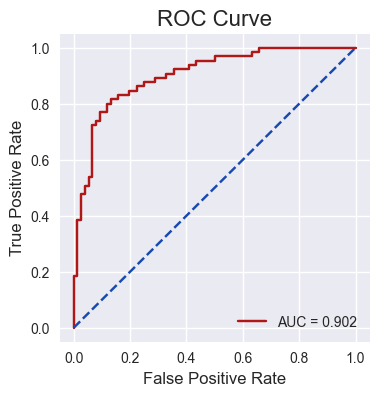

In [43]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Naive Bayes does not have many hyperparameters to tune, so we use an empty grid
nb_param_grid = {}

# Find the best parameters
nb_best_model, nb_test_results = find_best_params(
    model=nb_model,
    param_grid=nb_param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    cv=5
)

# Visualize the results
visualize_results(nb_best_model, X_test, y_test, class_labels=['No HeartDisease', 'HeartDisease'])


### KNeighborsClassifier

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Test set accuracy: 0.83
Test set precision: 0.78
Test set recall: 0.88


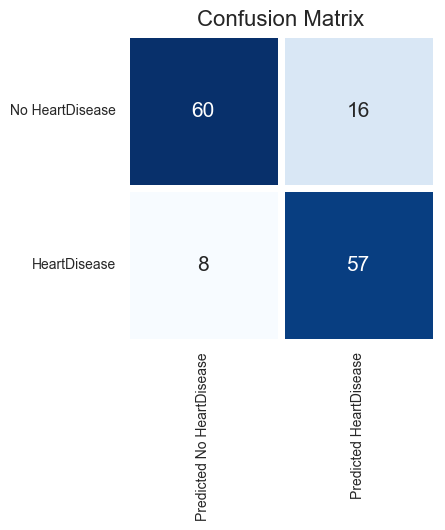

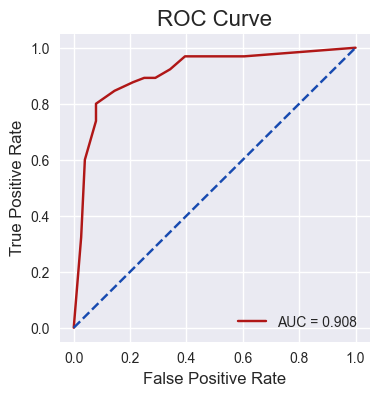

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-NN model
knn_model = KNeighborsClassifier()

# Define the parameter grid for K-NN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Find the best parameters
knn_best_model, knn_test_results = find_best_params(
    model=knn_model,
    param_grid=knn_param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    cv=5
)

# Visualize the results
visualize_results(knn_best_model, X_test, y_test, class_labels=['No HeartDisease', 'HeartDisease'])


In [44]:
# from sklearn.tree import DecisionTreeClassifier
# import joblib
# import pickle
# # # Khởi tạo mô hình với các tham số
# knn_model = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 11, weights= 'uniform')
# # Huấn luyện mô hình
# knn_model.fit(X_train, y_train)

# # Lưu mô hình vào file
# with open('knn_model.pkl', 'wb') as file:
#     pickle.dump(knn_model, file)


### Decision Tree

Best parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Test set accuracy: 0.84
Test set precision: 0.83
Test set recall: 0.83


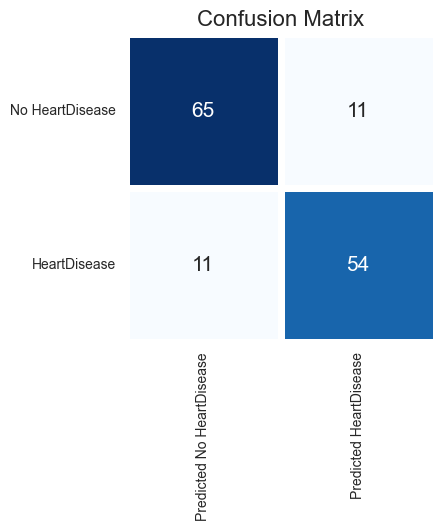

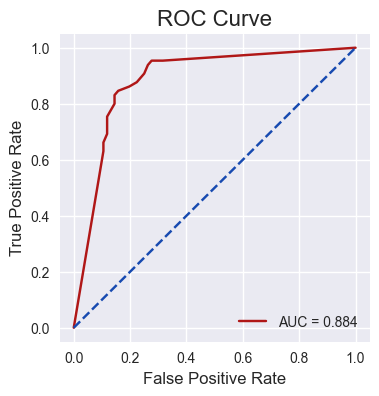

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 10, 20, 30, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 5]  # Minimum samples per leaf node
}

# Find the best parameters
dt_best_model, dt_test_results = find_best_params(
    model=dt_model,
    param_grid=dt_param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    cv=5
)

# Visualize the results
visualize_results(dt_best_model, X_test, y_test, class_labels=['No HeartDisease', 'HeartDisease'])


In [46]:
# from sklearn.tree import DecisionTreeClassifier
# import joblib
# import pickle
# # # Khởi tạo mô hình với các tham số
# dt_model = DecisionTreeClassifier(
#     criterion='entropy',
#     max_depth=None,
#     min_samples_leaf=5,
#     min_samples_split=2,
#     random_state=42
# )

# # Huấn luyện mô hình
# dt_model.fit(X_train, y_train)

# # Lưu mô hình vào file
# with open('decision_tree_model2.pkl', 'wb') as file:
#     pickle.dump(dt_model, file)


## 2) Deep Learning 

In [49]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.metrics import f1_score
from torch.utils.tensorboard import SummaryWriter

Looking in indexes: https://download.pytorch.org/whl/cu118Note: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
     ----------------------------- ---------- 3.9/5.3 MB 23.5 MB/s eta 0:00:01
     ---------------------------------------- 5.3/5.3 MB 23.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
     ---------------------------------------- 4.0/4.0 MB 21.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 GB 27.4 MB/s eta 0:01:39
     ---------------------------------------- 0.0/2.7 GB 32.9 MB/s eta 0:01:22
     ---------------------------------------- 0.0/2.7 GB 34.0 MB/s eta 0:01:19
     ---------------------------------------- 0.0/2.7 GB 34.9 MB/s eta 0:01:17
      --------------------------------------- 0.0/2.7 GB 34.6 MB/s eta 0:01:18
      ------------------------

ImportError: DLL load failed while importing _C: The specified module could not be found.

### 2.1) Define Models

#### Neural Network

In [48]:
class MyModel(nn.Module):
    def __init__(self, input_dim):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 2)

        self.activation = nn.LeakyReLU(negative_slope=0.01)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.activation(self.fc2(x))
        x = self.dropout(x)
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x

#### MLP - Multilayer Perceptron

In [49]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dims=[64, 32], output_dim=2):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### 2.2) Training and Evaluate Model

In [50]:
# Prepare the data
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [51]:
# Configure parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()   # Using CrossEntropyLoss


In [52]:
# Updated Trainer class with model saving
class Trainer():
    def __init__(self, writer):
        self.best_acc = 0.0  # To track the best validation accuracy
        self.writer = writer
    def train(self, model, dataloader, epoch, epochs, criterion, optimizer, device):
        progress_bar = tqdm(dataloader, colour='#800080', ncols=120)
        model = model.to(device)
        model.train()
        for iteration, batch in enumerate(progress_bar):
            X, y = batch[0].to(device), batch[1].to(device)
            y_pred = model(X)
            loss = criterion(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            self.writer.add_scalar("Loss/train",loss,epoch*len(dataloader)+iteration)
            progress_bar.set_description(f"TRAIN | Epoch: {epoch+1}/{epochs} | Iter: {iteration+1}/{len(dataloader)} | Loss: {(loss.item()):.4f}")
    
    def validation(self, model, dataloader, criterion, device, model_path, epoch):
        all_losses = []
        all_labels = []
        all_predictions = []
        
        model.eval()
        with torch.no_grad():
            for batch in dataloader:
                X, y = batch[0].to(device), batch[1].to(device)
                outputs = model(X)
                loss = criterion(outputs, y)
                _, predicted = torch.max(outputs, 1)
                
                all_losses.append(loss.item())
                all_labels.extend(y.tolist())
                all_predictions.extend(predicted.tolist())
                
            #cacular mean loss
            loss = np.mean(all_losses)
            #built accuracy_score
            accuracy = accuracy_score(all_labels,all_predictions)
            print("TEST | Loss:{:0.4f} | Acc:{:0.4f}".format(loss,accuracy))
            #add_scalar test - loss, accuracy
            self.writer.add_scalar("Test/Loss",loss,epoch)
            self.writer.add_scalar("Test/Accuracy",accuracy,epoch)
            
            if accuracy > self.best_acc: 
                self.best_acc= accuracy
                torch.save(model.state_dict(), model_path)
                print(f"New best model saved with Validation Accuracy: {accuracy*100:.2f}%")
                
    

    def evaluate(self, model, dataloader, device):
        model.eval()
        true_labels = []
        predicted = []
    
        with torch.no_grad():
            for batch in dataloader:
                X, y = batch[0].to(device), batch[1].to(device)
                outputs = model(X)
                _, preds = torch.max(outputs, 1)
    
                true_labels.extend(y.cpu().numpy())
                predicted.extend(preds.cpu().numpy())
    
        accuracy = accuracy_score(true_labels, predicted)
        result = classification_report(true_labels, predicted, output_dict=True)
        result_df = pd.DataFrame(result).transpose().reset_index()
    
        print(result_df)
    
        return {
            'accuracy': accuracy,
            'precision': precision_score(true_labels, predicted, average='weighted'),
            'recall': recall_score(true_labels, predicted, average='weighted'),
            'f1-score': f1_score(true_labels, predicted, average='weighted'),
        }



In [53]:
def load_trained_model(model_class, model_path, device="cpu"):
    """
    Load a trained model from a saved state dictionary.
    
    Parameters:
    - model_class: The class of the model to instantiate.
    - model_path: Path to the saved model state dictionary.
    - device: The device to load the model onto (e.g., "cpu" or "cuda").
    
    Returns:
    - model: The loaded model ready for evaluation.
    """
    try:
        model = model_class.to(device)  # Instantiate the model
        model.load_state_dict(torch.load(model_path, map_location=device))  # Load state dict
        model.eval()  # Set the model to evaluation mode
        print(f"Loaded model from {model_path} successfully.")
        return model
    except Exception as e:
        print(f"Failed to load model from {model_path}: {e}")
        return None

In [54]:
# Initialize SimpleNN model
simple_nn_model = MyModel(X_train.shape[1]).to(device)
optimizer_simple_nn = optim.Adam(simple_nn_model.parameters(), lr=0.001)

# MLP model
mlp_model = MLP(X_train.shape[1]).to(device)
optimizer_mlp = optim.Adam(mlp_model.parameters(), lr=0.001)
# Initialize Trainer
epochs = 100

In [55]:
# Initialize TensorBoard SummaryWriter for SimpleNN
NN_writer = SummaryWriter(log_dir='runs/SimpleNN_experiment')
NN_trainer = Trainer(NN_writer)

print("Training SimpleNN model...")
for epoch in range(epochs):
    # Training step
    NN_trainer.train(simple_nn_model, train_loader, epoch, epochs, criterion, optimizer_simple_nn, device)

    # Validation step  model, dataloader, criterion, device, model_path, epoch
    NN_trainer.validation(simple_nn_model, test_loader, criterion, device, "best_NN_model.pth", epoch)


Training SimpleNN model...


TRAIN | Epoch: 1/100 | Iter: 9/9 | Loss: 0.6759: 100%|████████████████████████████████████| 9/9 [00:00<00:00, 57.59it/s]


TEST | Loss:0.6630 | Acc:0.7872
New best model saved with Validation Accuracy: 78.72%


TRAIN | Epoch: 2/100 | Iter: 9/9 | Loss: 0.5994: 100%|███████████████████████████████████| 9/9 [00:00<00:00, 195.44it/s]


TEST | Loss:0.6160 | Acc:0.8156
New best model saved with Validation Accuracy: 81.56%


TRAIN | Epoch: 3/100 | Iter: 9/9 | Loss: 0.5789: 100%|███████████████████████████████████| 9/9 [00:00<00:00, 200.30it/s]


TEST | Loss:0.5376 | Acc:0.8156


TRAIN | Epoch: 4/100 | Iter: 9/9 | Loss: 0.3978: 100%|███████████████████████████████████| 9/9 [00:00<00:00, 185.43it/s]


TEST | Loss:0.4570 | Acc:0.8085


TRAIN | Epoch: 5/100 | Iter: 9/9 | Loss: 0.5424: 100%|███████████████████████████████████| 9/9 [00:00<00:00, 184.39it/s]


TEST | Loss:0.4268 | Acc:0.8085


TRAIN | Epoch: 6/100 | Iter: 9/9 | Loss: 0.3395: 100%|███████████████████████████████████| 9/9 [00:00<00:00, 189.68it/s]


TEST | Loss:0.4292 | Acc:0.8085


TRAIN | Epoch: 7/100 | Iter: 9/9 | Loss: 0.3719: 100%|███████████████████████████████████| 9/9 [00:00<00:00, 201.23it/s]


TEST | Loss:0.4213 | Acc:0.8085


TRAIN | Epoch: 8/100 | Iter: 9/9 | Loss: 0.4600: 100%|███████████████████████████████████| 9/9 [00:00<00:00, 190.33it/s]


TEST | Loss:0.4177 | Acc:0.8085


TRAIN | Epoch: 9/100 | Iter: 9/9 | Loss: 0.3125: 100%|███████████████████████████████████| 9/9 [00:00<00:00, 192.31it/s]


TEST | Loss:0.4134 | Acc:0.8085


TRAIN | Epoch: 10/100 | Iter: 9/9 | Loss: 0.2770: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 203.05it/s]


TEST | Loss:0.4140 | Acc:0.8227
New best model saved with Validation Accuracy: 82.27%


TRAIN | Epoch: 11/100 | Iter: 9/9 | Loss: 0.4233: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 210.13it/s]


TEST | Loss:0.4146 | Acc:0.8227


TRAIN | Epoch: 12/100 | Iter: 9/9 | Loss: 0.3005: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 205.93it/s]


TEST | Loss:0.4138 | Acc:0.8298
New best model saved with Validation Accuracy: 82.98%


TRAIN | Epoch: 13/100 | Iter: 9/9 | Loss: 0.2620: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 183.89it/s]


TEST | Loss:0.4119 | Acc:0.8298


TRAIN | Epoch: 14/100 | Iter: 9/9 | Loss: 0.2824: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 199.00it/s]


TEST | Loss:0.4131 | Acc:0.8440
New best model saved with Validation Accuracy: 84.40%


TRAIN | Epoch: 15/100 | Iter: 9/9 | Loss: 0.3415: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 220.06it/s]


TEST | Loss:0.4159 | Acc:0.8369


TRAIN | Epoch: 16/100 | Iter: 9/9 | Loss: 0.2781: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 214.98it/s]


TEST | Loss:0.4166 | Acc:0.8369


TRAIN | Epoch: 17/100 | Iter: 9/9 | Loss: 0.3039: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 200.05it/s]


TEST | Loss:0.4172 | Acc:0.8440


TRAIN | Epoch: 18/100 | Iter: 9/9 | Loss: 0.3625: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 195.53it/s]


TEST | Loss:0.4174 | Acc:0.8582
New best model saved with Validation Accuracy: 85.82%


TRAIN | Epoch: 19/100 | Iter: 9/9 | Loss: 0.5020: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 204.69it/s]


TEST | Loss:0.4191 | Acc:0.8440


TRAIN | Epoch: 20/100 | Iter: 9/9 | Loss: 0.1412: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 194.10it/s]


TEST | Loss:0.4192 | Acc:0.8511


TRAIN | Epoch: 21/100 | Iter: 9/9 | Loss: 0.2855: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 194.31it/s]


TEST | Loss:0.4216 | Acc:0.8369


TRAIN | Epoch: 22/100 | Iter: 9/9 | Loss: 0.3702: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 187.51it/s]


TEST | Loss:0.4239 | Acc:0.8369


TRAIN | Epoch: 23/100 | Iter: 9/9 | Loss: 0.3025: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 193.68it/s]


TEST | Loss:0.4238 | Acc:0.8369


TRAIN | Epoch: 24/100 | Iter: 9/9 | Loss: 0.2600: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 185.72it/s]


TEST | Loss:0.4221 | Acc:0.8369


TRAIN | Epoch: 25/100 | Iter: 9/9 | Loss: 0.3061: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 186.72it/s]


TEST | Loss:0.4204 | Acc:0.8369


TRAIN | Epoch: 26/100 | Iter: 9/9 | Loss: 0.3981: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 209.01it/s]


TEST | Loss:0.4217 | Acc:0.8369


TRAIN | Epoch: 27/100 | Iter: 9/9 | Loss: 0.5266: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 186.99it/s]


TEST | Loss:0.4178 | Acc:0.8440


TRAIN | Epoch: 28/100 | Iter: 9/9 | Loss: 0.2448: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 195.91it/s]


TEST | Loss:0.4120 | Acc:0.8369


TRAIN | Epoch: 29/100 | Iter: 9/9 | Loss: 0.3245: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 198.72it/s]


TEST | Loss:0.4093 | Acc:0.8369


TRAIN | Epoch: 30/100 | Iter: 9/9 | Loss: 0.3377: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 206.29it/s]


TEST | Loss:0.4075 | Acc:0.8440


TRAIN | Epoch: 31/100 | Iter: 9/9 | Loss: 0.2774: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 200.59it/s]


TEST | Loss:0.4103 | Acc:0.8440


TRAIN | Epoch: 32/100 | Iter: 9/9 | Loss: 0.3308: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 189.66it/s]


TEST | Loss:0.4091 | Acc:0.8440


TRAIN | Epoch: 33/100 | Iter: 9/9 | Loss: 0.3760: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 194.29it/s]


TEST | Loss:0.4052 | Acc:0.8440


TRAIN | Epoch: 34/100 | Iter: 9/9 | Loss: 0.1503: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 207.66it/s]


TEST | Loss:0.4012 | Acc:0.8440


TRAIN | Epoch: 35/100 | Iter: 9/9 | Loss: 0.2150: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 201.43it/s]


TEST | Loss:0.4045 | Acc:0.8440


TRAIN | Epoch: 36/100 | Iter: 9/9 | Loss: 0.1918: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 192.26it/s]


TEST | Loss:0.4097 | Acc:0.8440


TRAIN | Epoch: 37/100 | Iter: 9/9 | Loss: 0.2702: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 212.14it/s]


TEST | Loss:0.4133 | Acc:0.8440


TRAIN | Epoch: 38/100 | Iter: 9/9 | Loss: 0.3144: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 202.62it/s]


TEST | Loss:0.4081 | Acc:0.8369


TRAIN | Epoch: 39/100 | Iter: 9/9 | Loss: 0.2184: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 209.06it/s]


TEST | Loss:0.4049 | Acc:0.8227


TRAIN | Epoch: 40/100 | Iter: 9/9 | Loss: 0.4638: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 203.32it/s]


TEST | Loss:0.4051 | Acc:0.8227


TRAIN | Epoch: 41/100 | Iter: 9/9 | Loss: 0.2112: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 188.79it/s]


TEST | Loss:0.4008 | Acc:0.8156


TRAIN | Epoch: 42/100 | Iter: 9/9 | Loss: 0.3074: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 186.26it/s]


TEST | Loss:0.3921 | Acc:0.8440


TRAIN | Epoch: 43/100 | Iter: 9/9 | Loss: 0.2292: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 199.20it/s]


TEST | Loss:0.3914 | Acc:0.8652
New best model saved with Validation Accuracy: 86.52%


TRAIN | Epoch: 44/100 | Iter: 9/9 | Loss: 0.3332: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 200.54it/s]


TEST | Loss:0.3918 | Acc:0.8511


TRAIN | Epoch: 45/100 | Iter: 9/9 | Loss: 0.3674: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 199.56it/s]


TEST | Loss:0.4000 | Acc:0.8227


TRAIN | Epoch: 46/100 | Iter: 9/9 | Loss: 0.5686: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 209.98it/s]


TEST | Loss:0.3957 | Acc:0.8440


TRAIN | Epoch: 47/100 | Iter: 9/9 | Loss: 0.3501: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 208.08it/s]


TEST | Loss:0.3935 | Acc:0.8582


TRAIN | Epoch: 48/100 | Iter: 9/9 | Loss: 0.3287: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 208.41it/s]


TEST | Loss:0.3937 | Acc:0.8511


TRAIN | Epoch: 49/100 | Iter: 9/9 | Loss: 0.2057: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 190.65it/s]


TEST | Loss:0.3933 | Acc:0.8298


TRAIN | Epoch: 50/100 | Iter: 9/9 | Loss: 0.2233: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 187.61it/s]


TEST | Loss:0.3883 | Acc:0.8582


TRAIN | Epoch: 51/100 | Iter: 9/9 | Loss: 0.3597: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 199.24it/s]


TEST | Loss:0.3928 | Acc:0.8369


TRAIN | Epoch: 52/100 | Iter: 9/9 | Loss: 0.1597: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 201.19it/s]


TEST | Loss:0.3815 | Acc:0.8582


TRAIN | Epoch: 53/100 | Iter: 9/9 | Loss: 0.2867: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 193.40it/s]


TEST | Loss:0.3765 | Acc:0.8582


TRAIN | Epoch: 54/100 | Iter: 9/9 | Loss: 0.2271: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 186.52it/s]


TEST | Loss:0.3766 | Acc:0.8652


TRAIN | Epoch: 55/100 | Iter: 9/9 | Loss: 0.2051: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 196.75it/s]


TEST | Loss:0.3779 | Acc:0.8652


TRAIN | Epoch: 56/100 | Iter: 9/9 | Loss: 0.1701: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 204.80it/s]


TEST | Loss:0.3815 | Acc:0.8652


TRAIN | Epoch: 57/100 | Iter: 9/9 | Loss: 0.2237: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 200.06it/s]


TEST | Loss:0.3835 | Acc:0.8582


TRAIN | Epoch: 58/100 | Iter: 9/9 | Loss: 0.2987: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 197.16it/s]


TEST | Loss:0.3816 | Acc:0.8582


TRAIN | Epoch: 59/100 | Iter: 9/9 | Loss: 0.2664: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 203.65it/s]


TEST | Loss:0.3779 | Acc:0.8511


TRAIN | Epoch: 60/100 | Iter: 9/9 | Loss: 0.1827: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 179.22it/s]


TEST | Loss:0.3841 | Acc:0.8511


TRAIN | Epoch: 61/100 | Iter: 9/9 | Loss: 0.3045: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 196.30it/s]


TEST | Loss:0.3959 | Acc:0.8511


TRAIN | Epoch: 62/100 | Iter: 9/9 | Loss: 0.4399: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 183.43it/s]


TEST | Loss:0.3967 | Acc:0.8582


TRAIN | Epoch: 63/100 | Iter: 9/9 | Loss: 0.2508: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 189.86it/s]


TEST | Loss:0.3875 | Acc:0.8723
New best model saved with Validation Accuracy: 87.23%


TRAIN | Epoch: 64/100 | Iter: 9/9 | Loss: 0.1514: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 201.02it/s]


TEST | Loss:0.3824 | Acc:0.8723


TRAIN | Epoch: 65/100 | Iter: 9/9 | Loss: 0.2312: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 210.01it/s]


TEST | Loss:0.3829 | Acc:0.8582


TRAIN | Epoch: 66/100 | Iter: 9/9 | Loss: 0.2251: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 198.99it/s]


TEST | Loss:0.3798 | Acc:0.8652


TRAIN | Epoch: 67/100 | Iter: 9/9 | Loss: 0.2030: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 190.47it/s]


TEST | Loss:0.3814 | Acc:0.8652


TRAIN | Epoch: 68/100 | Iter: 9/9 | Loss: 0.1503: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 197.03it/s]


TEST | Loss:0.3796 | Acc:0.8652


TRAIN | Epoch: 69/100 | Iter: 9/9 | Loss: 0.2456: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 191.34it/s]


TEST | Loss:0.3729 | Acc:0.8652


TRAIN | Epoch: 70/100 | Iter: 9/9 | Loss: 0.1369: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 205.58it/s]


TEST | Loss:0.3652 | Acc:0.8723


TRAIN | Epoch: 71/100 | Iter: 9/9 | Loss: 0.2618: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 192.09it/s]


TEST | Loss:0.3753 | Acc:0.8582


TRAIN | Epoch: 72/100 | Iter: 9/9 | Loss: 0.1601: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 199.29it/s]


TEST | Loss:0.3779 | Acc:0.8582


TRAIN | Epoch: 73/100 | Iter: 9/9 | Loss: 0.1867: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 202.42it/s]


TEST | Loss:0.3725 | Acc:0.8652


TRAIN | Epoch: 74/100 | Iter: 9/9 | Loss: 0.3008: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 189.40it/s]


TEST | Loss:0.3711 | Acc:0.8723


TRAIN | Epoch: 75/100 | Iter: 9/9 | Loss: 0.1859: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 198.06it/s]


TEST | Loss:0.3732 | Acc:0.8723


TRAIN | Epoch: 76/100 | Iter: 9/9 | Loss: 0.2423: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 200.58it/s]


TEST | Loss:0.3829 | Acc:0.8652


TRAIN | Epoch: 77/100 | Iter: 9/9 | Loss: 0.2000: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 200.76it/s]


TEST | Loss:0.3887 | Acc:0.8652


TRAIN | Epoch: 78/100 | Iter: 9/9 | Loss: 0.2002: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 210.38it/s]


TEST | Loss:0.3863 | Acc:0.8723


TRAIN | Epoch: 79/100 | Iter: 9/9 | Loss: 0.1437: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 203.51it/s]


TEST | Loss:0.3793 | Acc:0.8652


TRAIN | Epoch: 80/100 | Iter: 9/9 | Loss: 0.1393: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 191.98it/s]


TEST | Loss:0.3763 | Acc:0.8723


TRAIN | Epoch: 81/100 | Iter: 9/9 | Loss: 0.2782: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 192.75it/s]


TEST | Loss:0.3799 | Acc:0.8723


TRAIN | Epoch: 82/100 | Iter: 9/9 | Loss: 0.2010: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 199.55it/s]


TEST | Loss:0.3860 | Acc:0.8723


TRAIN | Epoch: 83/100 | Iter: 9/9 | Loss: 0.1480: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 193.43it/s]


TEST | Loss:0.3934 | Acc:0.8723


TRAIN | Epoch: 84/100 | Iter: 9/9 | Loss: 0.2221: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 214.77it/s]


TEST | Loss:0.4021 | Acc:0.8652


TRAIN | Epoch: 85/100 | Iter: 9/9 | Loss: 0.0723: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 222.50it/s]


TEST | Loss:0.4049 | Acc:0.8652


TRAIN | Epoch: 86/100 | Iter: 9/9 | Loss: 0.2621: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 189.24it/s]


TEST | Loss:0.3921 | Acc:0.8723


TRAIN | Epoch: 87/100 | Iter: 9/9 | Loss: 0.3684: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 205.92it/s]


TEST | Loss:0.3890 | Acc:0.8652


TRAIN | Epoch: 88/100 | Iter: 9/9 | Loss: 0.1712: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 175.90it/s]


TEST | Loss:0.3811 | Acc:0.8582


TRAIN | Epoch: 89/100 | Iter: 9/9 | Loss: 0.2109: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 139.11it/s]


TEST | Loss:0.3779 | Acc:0.8794
New best model saved with Validation Accuracy: 87.94%


TRAIN | Epoch: 90/100 | Iter: 9/9 | Loss: 0.2435: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 194.12it/s]


TEST | Loss:0.3800 | Acc:0.8723


TRAIN | Epoch: 91/100 | Iter: 9/9 | Loss: 0.1280: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 177.57it/s]


TEST | Loss:0.3792 | Acc:0.8652


TRAIN | Epoch: 92/100 | Iter: 9/9 | Loss: 0.4057: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 189.81it/s]


TEST | Loss:0.3922 | Acc:0.8723


TRAIN | Epoch: 93/100 | Iter: 9/9 | Loss: 0.1521: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 197.08it/s]


TEST | Loss:0.3941 | Acc:0.8723


TRAIN | Epoch: 94/100 | Iter: 9/9 | Loss: 0.2630: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 184.94it/s]


TEST | Loss:0.3970 | Acc:0.8723


TRAIN | Epoch: 95/100 | Iter: 9/9 | Loss: 0.3480: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 196.85it/s]


TEST | Loss:0.3903 | Acc:0.8794


TRAIN | Epoch: 96/100 | Iter: 9/9 | Loss: 0.1185: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 191.05it/s]


TEST | Loss:0.3873 | Acc:0.8652


TRAIN | Epoch: 97/100 | Iter: 9/9 | Loss: 0.1328: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 204.16it/s]


TEST | Loss:0.3968 | Acc:0.8652


TRAIN | Epoch: 98/100 | Iter: 9/9 | Loss: 0.2519: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 205.40it/s]


TEST | Loss:0.4055 | Acc:0.8652


TRAIN | Epoch: 99/100 | Iter: 9/9 | Loss: 0.2177: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 188.91it/s]


TEST | Loss:0.4012 | Acc:0.8652


TRAIN | Epoch: 100/100 | Iter: 9/9 | Loss: 0.1853: 100%|█████████████████████████████████| 9/9 [00:00<00:00, 185.79it/s]


TEST | Loss:0.4062 | Acc:0.8652


In [56]:
# Initialize TensorBoard SummaryWriter
MLP_writer = SummaryWriter(log_dir='runs/MLP_experiment')
MLP_trainer = Trainer(MLP_writer)

print("Training MLP model...")
for epoch in range(epochs):
    # Training step
    MLP_trainer.train(mlp_model, train_loader, epoch, epochs, criterion, optimizer_mlp, device)

    # Validation step
    MLP_trainer.validation(mlp_model,test_loader, criterion, device, "best_MLP_model.pth", epoch)


Training MLP model...


TRAIN | Epoch: 1/100 | Iter: 9/9 | Loss: 0.6667: 100%|███████████████████████████████████| 9/9 [00:00<00:00, 198.76it/s]


TEST | Loss:0.6585 | Acc:0.7801
New best model saved with Validation Accuracy: 78.01%


TRAIN | Epoch: 2/100 | Iter: 9/9 | Loss: 0.6276: 100%|███████████████████████████████████| 9/9 [00:00<00:00, 217.26it/s]


TEST | Loss:0.6149 | Acc:0.7943
New best model saved with Validation Accuracy: 79.43%


TRAIN | Epoch: 3/100 | Iter: 9/9 | Loss: 0.5815: 100%|███████████████████████████████████| 9/9 [00:00<00:00, 219.50it/s]


TEST | Loss:0.5595 | Acc:0.7943


TRAIN | Epoch: 4/100 | Iter: 9/9 | Loss: 0.4603: 100%|███████████████████████████████████| 9/9 [00:00<00:00, 232.61it/s]


TEST | Loss:0.4952 | Acc:0.8014
New best model saved with Validation Accuracy: 80.14%


TRAIN | Epoch: 5/100 | Iter: 9/9 | Loss: 0.4418: 100%|███████████████████████████████████| 9/9 [00:00<00:00, 236.26it/s]


TEST | Loss:0.4354 | Acc:0.8156
New best model saved with Validation Accuracy: 81.56%


TRAIN | Epoch: 6/100 | Iter: 9/9 | Loss: 0.4329: 100%|███████████████████████████████████| 9/9 [00:00<00:00, 231.58it/s]


TEST | Loss:0.4026 | Acc:0.8156


TRAIN | Epoch: 7/100 | Iter: 9/9 | Loss: 0.3787: 100%|███████████████████████████████████| 9/9 [00:00<00:00, 236.17it/s]


TEST | Loss:0.3934 | Acc:0.8156


TRAIN | Epoch: 8/100 | Iter: 9/9 | Loss: 0.2462: 100%|███████████████████████████████████| 9/9 [00:00<00:00, 223.68it/s]


TEST | Loss:0.3974 | Acc:0.8085


TRAIN | Epoch: 9/100 | Iter: 9/9 | Loss: 0.3129: 100%|███████████████████████████████████| 9/9 [00:00<00:00, 224.46it/s]


TEST | Loss:0.4020 | Acc:0.8085


TRAIN | Epoch: 10/100 | Iter: 9/9 | Loss: 0.2787: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 227.10it/s]


TEST | Loss:0.4039 | Acc:0.8298
New best model saved with Validation Accuracy: 82.98%


TRAIN | Epoch: 11/100 | Iter: 9/9 | Loss: 0.2589: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 234.30it/s]


TEST | Loss:0.4049 | Acc:0.8298


TRAIN | Epoch: 12/100 | Iter: 9/9 | Loss: 0.3149: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 252.73it/s]


TEST | Loss:0.4122 | Acc:0.8298


TRAIN | Epoch: 13/100 | Iter: 9/9 | Loss: 0.4412: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 245.48it/s]


TEST | Loss:0.4078 | Acc:0.8298


TRAIN | Epoch: 14/100 | Iter: 9/9 | Loss: 0.2335: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 236.66it/s]


TEST | Loss:0.4055 | Acc:0.8298


TRAIN | Epoch: 15/100 | Iter: 9/9 | Loss: 0.1746: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 228.13it/s]


TEST | Loss:0.4037 | Acc:0.8369
New best model saved with Validation Accuracy: 83.69%


TRAIN | Epoch: 16/100 | Iter: 9/9 | Loss: 0.3839: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 253.15it/s]


TEST | Loss:0.4079 | Acc:0.8298


TRAIN | Epoch: 17/100 | Iter: 9/9 | Loss: 0.2580: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 230.51it/s]


TEST | Loss:0.4066 | Acc:0.8298


TRAIN | Epoch: 18/100 | Iter: 9/9 | Loss: 0.2215: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 229.50it/s]


TEST | Loss:0.4038 | Acc:0.8369


TRAIN | Epoch: 19/100 | Iter: 9/9 | Loss: 0.2173: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 209.25it/s]


TEST | Loss:0.4002 | Acc:0.8440
New best model saved with Validation Accuracy: 84.40%


TRAIN | Epoch: 20/100 | Iter: 9/9 | Loss: 0.2405: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 230.71it/s]


TEST | Loss:0.4009 | Acc:0.8440


TRAIN | Epoch: 21/100 | Iter: 9/9 | Loss: 0.2700: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 239.66it/s]


TEST | Loss:0.4011 | Acc:0.8440


TRAIN | Epoch: 22/100 | Iter: 9/9 | Loss: 0.2457: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 235.00it/s]


TEST | Loss:0.4035 | Acc:0.8440


TRAIN | Epoch: 23/100 | Iter: 9/9 | Loss: 0.2067: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 239.14it/s]


TEST | Loss:0.4002 | Acc:0.8511
New best model saved with Validation Accuracy: 85.11%


TRAIN | Epoch: 24/100 | Iter: 9/9 | Loss: 0.2345: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 238.36it/s]


TEST | Loss:0.3994 | Acc:0.8511


TRAIN | Epoch: 25/100 | Iter: 9/9 | Loss: 0.3826: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 229.59it/s]


TEST | Loss:0.3977 | Acc:0.8511


TRAIN | Epoch: 26/100 | Iter: 9/9 | Loss: 0.2791: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 236.36it/s]


TEST | Loss:0.3983 | Acc:0.8369


TRAIN | Epoch: 27/100 | Iter: 9/9 | Loss: 0.1606: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 237.73it/s]


TEST | Loss:0.3925 | Acc:0.8440


TRAIN | Epoch: 28/100 | Iter: 9/9 | Loss: 0.3177: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 228.84it/s]


TEST | Loss:0.3942 | Acc:0.8369


TRAIN | Epoch: 29/100 | Iter: 9/9 | Loss: 0.3323: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 239.86it/s]


TEST | Loss:0.3927 | Acc:0.8369


TRAIN | Epoch: 30/100 | Iter: 9/9 | Loss: 0.1407: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 225.40it/s]


TEST | Loss:0.3865 | Acc:0.8440


TRAIN | Epoch: 31/100 | Iter: 9/9 | Loss: 0.1882: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 238.32it/s]


TEST | Loss:0.3885 | Acc:0.8440


TRAIN | Epoch: 32/100 | Iter: 9/9 | Loss: 0.1543: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 249.14it/s]


TEST | Loss:0.3925 | Acc:0.8440


TRAIN | Epoch: 33/100 | Iter: 9/9 | Loss: 0.1927: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 257.01it/s]


TEST | Loss:0.3924 | Acc:0.8369


TRAIN | Epoch: 34/100 | Iter: 9/9 | Loss: 0.1302: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 229.75it/s]


TEST | Loss:0.3882 | Acc:0.8369


TRAIN | Epoch: 35/100 | Iter: 9/9 | Loss: 0.3279: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 225.14it/s]


TEST | Loss:0.3868 | Acc:0.8440


TRAIN | Epoch: 36/100 | Iter: 9/9 | Loss: 0.0985: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 235.44it/s]


TEST | Loss:0.3850 | Acc:0.8440


TRAIN | Epoch: 37/100 | Iter: 9/9 | Loss: 0.1509: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 237.34it/s]


TEST | Loss:0.3819 | Acc:0.8440


TRAIN | Epoch: 38/100 | Iter: 9/9 | Loss: 0.2478: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 255.23it/s]


TEST | Loss:0.3826 | Acc:0.8511


TRAIN | Epoch: 39/100 | Iter: 9/9 | Loss: 0.1367: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 233.57it/s]


TEST | Loss:0.3823 | Acc:0.8440


TRAIN | Epoch: 40/100 | Iter: 9/9 | Loss: 0.2278: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 230.20it/s]


TEST | Loss:0.3834 | Acc:0.8511


TRAIN | Epoch: 41/100 | Iter: 9/9 | Loss: 0.1873: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 247.86it/s]


TEST | Loss:0.3824 | Acc:0.8511


TRAIN | Epoch: 42/100 | Iter: 9/9 | Loss: 0.2291: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 252.94it/s]


TEST | Loss:0.3832 | Acc:0.8582
New best model saved with Validation Accuracy: 85.82%


TRAIN | Epoch: 43/100 | Iter: 9/9 | Loss: 0.2086: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 228.75it/s]


TEST | Loss:0.3802 | Acc:0.8511


TRAIN | Epoch: 44/100 | Iter: 9/9 | Loss: 0.2144: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 236.24it/s]


TEST | Loss:0.3799 | Acc:0.8582


TRAIN | Epoch: 45/100 | Iter: 9/9 | Loss: 0.2409: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 233.64it/s]


TEST | Loss:0.3842 | Acc:0.8582


TRAIN | Epoch: 46/100 | Iter: 9/9 | Loss: 0.2303: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 224.46it/s]


TEST | Loss:0.3815 | Acc:0.8652
New best model saved with Validation Accuracy: 86.52%


TRAIN | Epoch: 47/100 | Iter: 9/9 | Loss: 0.0833: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 227.99it/s]


TEST | Loss:0.3831 | Acc:0.8582


TRAIN | Epoch: 48/100 | Iter: 9/9 | Loss: 0.1409: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 230.82it/s]


TEST | Loss:0.3792 | Acc:0.8723
New best model saved with Validation Accuracy: 87.23%


TRAIN | Epoch: 49/100 | Iter: 9/9 | Loss: 0.2382: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 232.29it/s]


TEST | Loss:0.3796 | Acc:0.8723


TRAIN | Epoch: 50/100 | Iter: 9/9 | Loss: 0.1566: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 240.73it/s]


TEST | Loss:0.3780 | Acc:0.8794
New best model saved with Validation Accuracy: 87.94%


TRAIN | Epoch: 51/100 | Iter: 9/9 | Loss: 0.3339: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 213.16it/s]


TEST | Loss:0.3823 | Acc:0.8865
New best model saved with Validation Accuracy: 88.65%


TRAIN | Epoch: 52/100 | Iter: 9/9 | Loss: 0.1039: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 221.24it/s]


TEST | Loss:0.3775 | Acc:0.8723


TRAIN | Epoch: 53/100 | Iter: 9/9 | Loss: 0.1595: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 221.10it/s]


TEST | Loss:0.3918 | Acc:0.8794


TRAIN | Epoch: 54/100 | Iter: 9/9 | Loss: 0.2136: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 237.60it/s]


TEST | Loss:0.3768 | Acc:0.8652


TRAIN | Epoch: 55/100 | Iter: 9/9 | Loss: 0.2479: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 223.84it/s]


TEST | Loss:0.3839 | Acc:0.8865


TRAIN | Epoch: 56/100 | Iter: 9/9 | Loss: 0.1591: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 245.35it/s]


TEST | Loss:0.3826 | Acc:0.8865


TRAIN | Epoch: 57/100 | Iter: 9/9 | Loss: 0.1645: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 243.12it/s]


TEST | Loss:0.3799 | Acc:0.8723


TRAIN | Epoch: 58/100 | Iter: 9/9 | Loss: 0.2571: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 218.31it/s]


TEST | Loss:0.3910 | Acc:0.8865


TRAIN | Epoch: 59/100 | Iter: 9/9 | Loss: 0.1623: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 235.34it/s]


TEST | Loss:0.3772 | Acc:0.8936
New best model saved with Validation Accuracy: 89.36%


TRAIN | Epoch: 60/100 | Iter: 9/9 | Loss: 0.1999: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 239.75it/s]


TEST | Loss:0.3795 | Acc:0.8936


TRAIN | Epoch: 61/100 | Iter: 9/9 | Loss: 0.1464: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 239.90it/s]


TEST | Loss:0.3915 | Acc:0.8936


TRAIN | Epoch: 62/100 | Iter: 9/9 | Loss: 0.2210: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 244.46it/s]


TEST | Loss:0.3939 | Acc:0.8936


TRAIN | Epoch: 63/100 | Iter: 9/9 | Loss: 0.1176: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 227.84it/s]


TEST | Loss:0.3926 | Acc:0.8936


TRAIN | Epoch: 64/100 | Iter: 9/9 | Loss: 0.1181: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 222.09it/s]


TEST | Loss:0.3900 | Acc:0.8865


TRAIN | Epoch: 65/100 | Iter: 9/9 | Loss: 0.0901: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 226.67it/s]


TEST | Loss:0.3901 | Acc:0.8936


TRAIN | Epoch: 66/100 | Iter: 9/9 | Loss: 0.0942: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 233.88it/s]


TEST | Loss:0.3968 | Acc:0.8936


TRAIN | Epoch: 67/100 | Iter: 9/9 | Loss: 0.0971: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 244.02it/s]


TEST | Loss:0.3928 | Acc:0.8936


TRAIN | Epoch: 68/100 | Iter: 9/9 | Loss: 0.2214: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 245.46it/s]


TEST | Loss:0.3979 | Acc:0.8936


TRAIN | Epoch: 69/100 | Iter: 9/9 | Loss: 0.1451: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 227.09it/s]


TEST | Loss:0.4047 | Acc:0.8936


TRAIN | Epoch: 70/100 | Iter: 9/9 | Loss: 0.0714: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 230.44it/s]


TEST | Loss:0.4037 | Acc:0.8936


TRAIN | Epoch: 71/100 | Iter: 9/9 | Loss: 0.1172: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 203.26it/s]


TEST | Loss:0.4129 | Acc:0.8936


TRAIN | Epoch: 72/100 | Iter: 9/9 | Loss: 0.1359: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 212.16it/s]


TEST | Loss:0.4118 | Acc:0.8936


TRAIN | Epoch: 73/100 | Iter: 9/9 | Loss: 0.1116: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 203.21it/s]


TEST | Loss:0.4076 | Acc:0.8936


TRAIN | Epoch: 74/100 | Iter: 9/9 | Loss: 0.1483: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 235.43it/s]


TEST | Loss:0.4117 | Acc:0.8936


TRAIN | Epoch: 75/100 | Iter: 9/9 | Loss: 0.1005: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 235.71it/s]


TEST | Loss:0.4197 | Acc:0.8936


TRAIN | Epoch: 76/100 | Iter: 9/9 | Loss: 0.1288: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 238.99it/s]


TEST | Loss:0.4158 | Acc:0.8936


TRAIN | Epoch: 77/100 | Iter: 9/9 | Loss: 0.1502: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 229.72it/s]


TEST | Loss:0.4209 | Acc:0.8865


TRAIN | Epoch: 78/100 | Iter: 9/9 | Loss: 0.0911: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 226.05it/s]


TEST | Loss:0.4267 | Acc:0.8936


TRAIN | Epoch: 79/100 | Iter: 9/9 | Loss: 0.1105: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 220.88it/s]


TEST | Loss:0.4333 | Acc:0.8865


TRAIN | Epoch: 80/100 | Iter: 9/9 | Loss: 0.0772: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 239.00it/s]


TEST | Loss:0.4306 | Acc:0.8936


TRAIN | Epoch: 81/100 | Iter: 9/9 | Loss: 0.1033: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 241.09it/s]


TEST | Loss:0.4387 | Acc:0.8865


TRAIN | Epoch: 82/100 | Iter: 9/9 | Loss: 0.1042: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 244.11it/s]


TEST | Loss:0.4355 | Acc:0.8865


TRAIN | Epoch: 83/100 | Iter: 9/9 | Loss: 0.1819: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 238.88it/s]


TEST | Loss:0.4440 | Acc:0.8865


TRAIN | Epoch: 84/100 | Iter: 9/9 | Loss: 0.1000: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 226.49it/s]


TEST | Loss:0.4508 | Acc:0.8865


TRAIN | Epoch: 85/100 | Iter: 9/9 | Loss: 0.0849: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 228.10it/s]


TEST | Loss:0.4507 | Acc:0.8865


TRAIN | Epoch: 86/100 | Iter: 9/9 | Loss: 0.1007: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 222.55it/s]


TEST | Loss:0.4680 | Acc:0.8865


TRAIN | Epoch: 87/100 | Iter: 9/9 | Loss: 0.0692: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 229.02it/s]


TEST | Loss:0.4662 | Acc:0.8865


TRAIN | Epoch: 88/100 | Iter: 9/9 | Loss: 0.0722: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 243.57it/s]


TEST | Loss:0.4651 | Acc:0.8865


TRAIN | Epoch: 89/100 | Iter: 9/9 | Loss: 0.0753: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 229.05it/s]


TEST | Loss:0.4573 | Acc:0.8865


TRAIN | Epoch: 90/100 | Iter: 9/9 | Loss: 0.0788: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 231.88it/s]


TEST | Loss:0.4651 | Acc:0.8865


TRAIN | Epoch: 91/100 | Iter: 9/9 | Loss: 0.0675: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 235.48it/s]


TEST | Loss:0.4820 | Acc:0.8865


TRAIN | Epoch: 92/100 | Iter: 9/9 | Loss: 0.0396: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 215.37it/s]


TEST | Loss:0.4741 | Acc:0.8794


TRAIN | Epoch: 93/100 | Iter: 9/9 | Loss: 0.1032: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 223.33it/s]


TEST | Loss:0.4971 | Acc:0.8865


TRAIN | Epoch: 94/100 | Iter: 9/9 | Loss: 0.0510: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 237.79it/s]


TEST | Loss:0.4920 | Acc:0.8865


TRAIN | Epoch: 95/100 | Iter: 9/9 | Loss: 0.1136: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 238.34it/s]


TEST | Loss:0.4972 | Acc:0.8865


TRAIN | Epoch: 96/100 | Iter: 9/9 | Loss: 0.0772: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 235.29it/s]


TEST | Loss:0.5105 | Acc:0.8865


TRAIN | Epoch: 97/100 | Iter: 9/9 | Loss: 0.1371: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 236.62it/s]


TEST | Loss:0.5024 | Acc:0.8865


TRAIN | Epoch: 98/100 | Iter: 9/9 | Loss: 0.0688: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 235.33it/s]


TEST | Loss:0.5124 | Acc:0.8865


TRAIN | Epoch: 99/100 | Iter: 9/9 | Loss: 0.0709: 100%|██████████████████████████████████| 9/9 [00:00<00:00, 234.55it/s]


TEST | Loss:0.5144 | Acc:0.8865


TRAIN | Epoch: 100/100 | Iter: 9/9 | Loss: 0.0796: 100%|█████████████████████████████████| 9/9 [00:00<00:00, 239.76it/s]


TEST | Loss:0.5319 | Acc:0.8865


In [57]:
# Load the best SimpleNN model
best_simple_nn_model = load_trained_model(simple_nn_model, "best_NN_model.pth", device)

# Load the best MLP model
best_mlp_model = load_trained_model(mlp_model, "best_MLP_model.pth", device)

Loaded model from best_NN_model.pth successfully.
Loaded model from best_MLP_model.pth successfully.


In [58]:
# Evaluate SimpleNN model
eval_results_simple_nn = NN_trainer.evaluate(best_simple_nn_model, test_loader, device)
print("\nEvaluation Results for SimpleNN: ", eval_results_simple_nn)
print("=============================================================")
# Evaluate MLP model
eval_results_mlp = MLP_trainer.evaluate(mlp_model, test_loader, device)
print("\nEvaluation Results for MLP: ", eval_results_mlp)

          index  precision  recall  f1-score  support
0             0       0.92    0.86      0.88    76.00
1             1       0.84    0.91      0.87    65.00
2      accuracy       0.88    0.88      0.88     0.88
3     macro avg       0.88    0.88      0.88   141.00
4  weighted avg       0.88    0.88      0.88   141.00

Evaluation Results for SimpleNN:  {'accuracy': 0.8794326241134752, 'precision': 0.8820083622301184, 'recall': 0.8794326241134752, 'f1-score': 0.8796148877202575}
          index  precision  recall  f1-score  support
0             0       0.93    0.87      0.90    76.00
1             1       0.86    0.92      0.89    65.00
2      accuracy       0.89    0.89      0.89     0.89
3     macro avg       0.89    0.90      0.89   141.00
4  weighted avg       0.90    0.89      0.89   141.00

Evaluation Results for MLP:  {'accuracy': 0.8936170212765957, 'precision': 0.8961856243846055, 'recall': 0.8936170212765957, 'f1-score': 0.8937778421061096}


#### MLP - Tensorboard

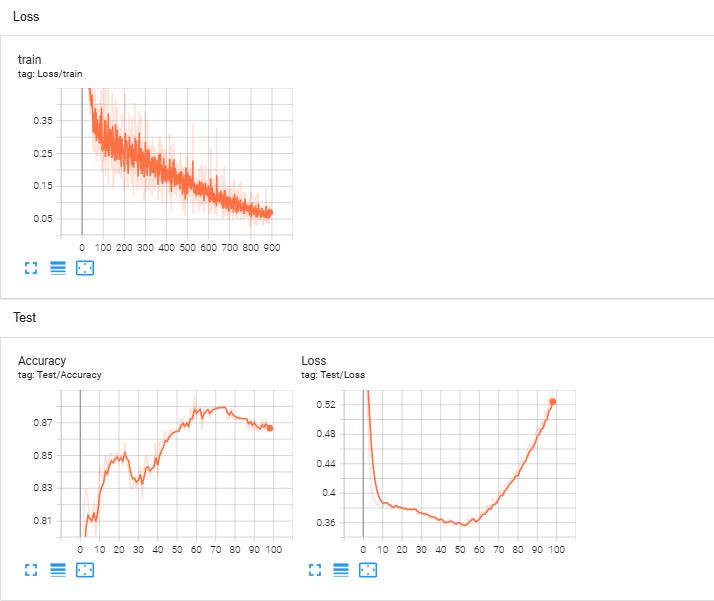
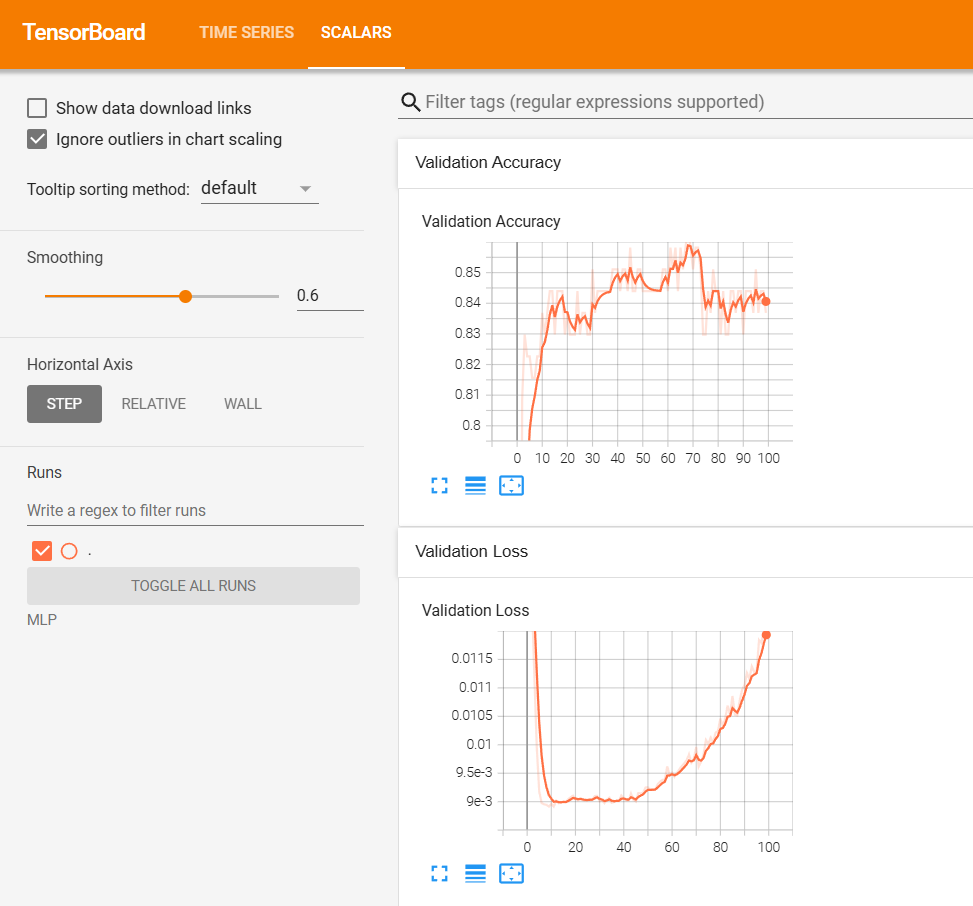

### NN-Tensorboard

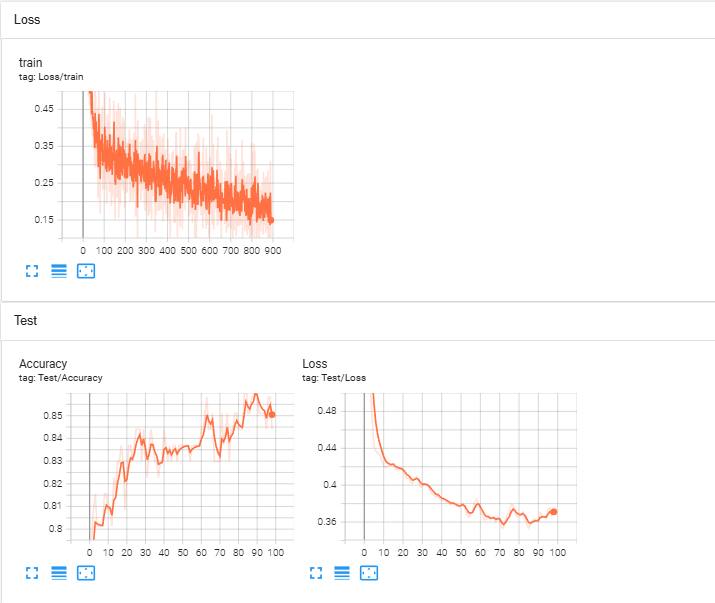
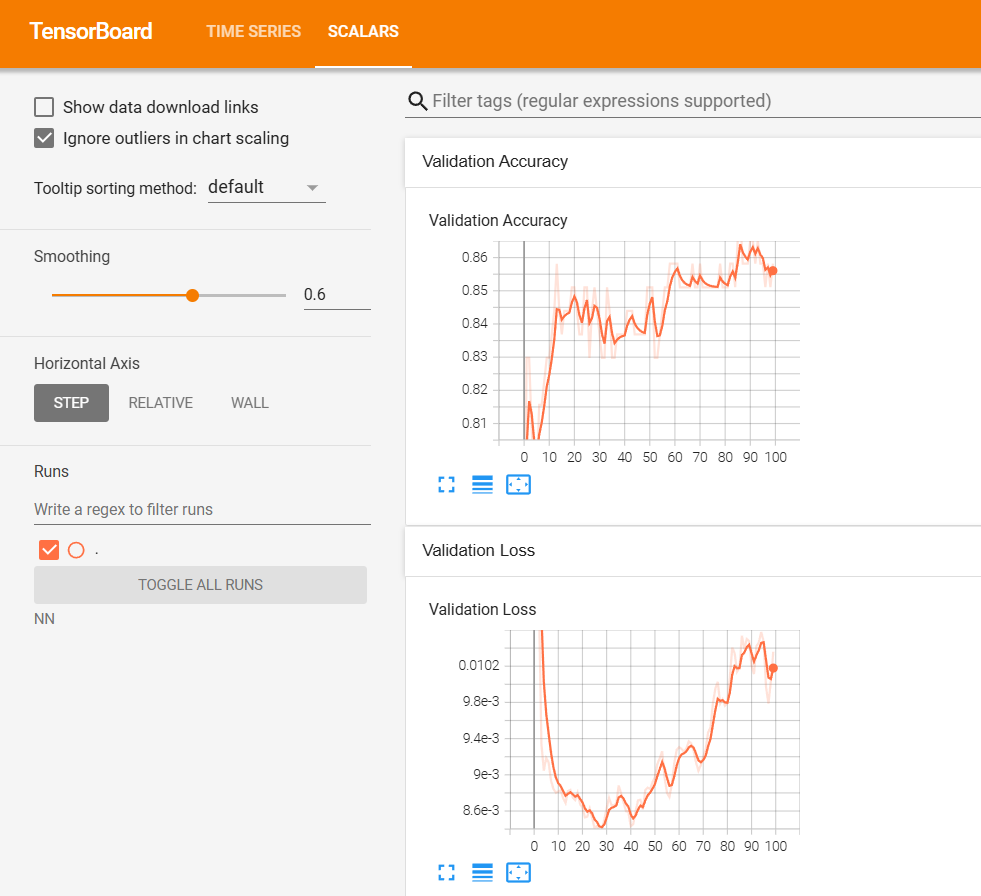